# <span style="color: #e3db24;">00 | Libraries and Settings</span>

In [205]:
# 📕📗📘 Basic Libraries
import pandas as pd
import glob
import numpy as np
from numpy import rec
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats

In [107]:
# 🙌 Settings
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.float_format', '{:,.2f}'.format)
import warnings
warnings.filterwarnings('ignore') # ignore warnings

# <span style="color: #e3db24;">01 | Data Extraction and Exploration</span>


<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Next Steps: Merge all excel files on the column "country"</strong>
<p>I have extracted 20 excel files containing data on female labour and indicators which might be connected to it from the OECD Family Database and the Eurostat Labour Force Survey. Each file contains at least two columns, some several. Each table contains the column "country". In the following, I will create one dataframe for all the data and merge them on their common column "country".</p>
</div>

In [108]:
folder_path = "data/edited_data"  # path to folder containing the data
file_pattern = f"{folder_path}/*.xlsx" # pattern to identify data

excel_files = glob.glob(file_pattern) # list of all excel files in this folder, the globe library finds every file according to the pattern

if len(excel_files) == 0: # raising an error if there are no excel files
    raise FileNotFoundError("No excel files found in this directory.")

merged_df = pd.read_excel(excel_files[0]) # import the first file

for file in excel_files[1:]: # iterate over all the other files and merging them one after the other
    df = pd.read_excel(file)
    merged_df = pd.merge(merged_df, df, on="country", how="outer")  # all rows, not only with countries from the first file

<h2 style="color: #ec7511;">Exploring the Data (First Impressions)</h2>

In [109]:
merged_df.shape

(62, 29)

In [110]:
merged_df.columns

Index(['country', 'usage_men_parental_leave', 'fertility',
       'rate_women_low_edu', 'rate_women_med_edu', 'rate_women_high_edu',
       'emp_women', 'emp_men', 'emp_mothers_partnered', 'emp_mothers_single',
       'gdp', 'pay_gap', 'emp_maternal', 'emp_pt_maternal', 'emp_ft_maternal',
       'age_first_child', 'rate_women_age_15-24', 'rate_women_age_25-29',
       'rate_women_age_30-34', 'rate_women_age_35-39', 'rate_women_age_40-44',
       'rate_women_age_45-49', 'fathers_full_paid_leave',
       'mothers_full_paid_leave', 'emp_women_pt', 'emp_men_pt',
       'spending_family_benefits', 'unemployment', 'manager_women'],
      dtype='object')

In [111]:
merged_df.head(10)

,country,usage_men_parental_leave,fertility,rate_women_low_edu,rate_women_med_edu,rate_women_high_edu,emp_women,emp_men,emp_mothers_partnered,emp_mothers_single,gdp,pay_gap,emp_maternal,emp_pt_maternal,emp_ft_maternal,age_first_child,rate_women_age_15-24,rate_women_age_25-29,rate_women_age_30-34,rate_women_age_35-39,rate_women_age_40-44,rate_women_age_45-49,fathers_full_paid_leave,mothers_full_paid_leave,emp_women_pt,emp_men_pt,spending_family_benefits,unemployment,manager_women
0,Argentina,NaN,1.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,0.51,1.70,NaN,NaN,NaN,NaN,NaN,74.74,59.37,NaN,11.35,72.18,37.10,35.07,29.60,NaN,NaN,NaN,NaN,NaN,NaN,0.92,8.30,NaN,NaN,NaN,NaN,40.00
2,Austria,3.56,1.48,20.90,47.70,31.40,70.30,77.90,75.83,73.27,"38,560.00",12.14,75.56,40.38,35.18,29.70,10.40,6.60,6.90,6.80,6.50,6.60,9.39,51.20,50.10,12.20,2.70,5.30,35.50
3,Belgium,33.16,1.60,21.90,34.90,43.20,63.30,69.90,77.99,64.04,"37,170.00",1.11,75.53,19.72,55.63,29.20,11.40,6.30,6.60,6.40,6.50,6.40,6.65,15.05,38.10,10.70,2.06,5.30,35.40
4,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,39.10,64.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.90,2.80,NaN,NaN,NaN
5,Brazil,NaN,1.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.00,NaN,NaN,NaN,..,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.70
6,Bulgaria,NaN,1.58,19.80,49.40,30.80,67.40,73.90,71.95,67.10,"7,730.00",8.81,71.13,0.61,68.52,26.40,8.60,4.60,6.10,6.70,7.30,7.80,1.93,73.14,1.50,1.30,1.59,4.40,38.30
7,Canada,23.51,1.43,NaN,NaN,NaN,NaN,NaN,77.16,74.32,NaN,16.14,76.77,14.84,61.93,..,NaN,NaN,NaN,NaN,NaN,NaN,2.02,19.89,NaN,NaN,NaN,NaN,35.60
8,Chile,NaN,1.54,NaN,NaN,NaN,NaN,NaN,53.24,69.77,NaN,15.37,59.38,11.62,47.72,..,NaN,NaN,NaN,NaN,NaN,NaN,1,30,NaN,NaN,NaN,NaN,30.40
9,China,NaN,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
merged_df.sample(10)

,country,usage_men_parental_leave,fertility,rate_women_low_edu,rate_women_med_edu,rate_women_high_edu,emp_women,emp_men,emp_mothers_partnered,emp_mothers_single,gdp,pay_gap,emp_maternal,emp_pt_maternal,emp_ft_maternal,age_first_child,rate_women_age_15-24,rate_women_age_25-29,rate_women_age_30-34,rate_women_age_35-39,rate_women_age_40-44,rate_women_age_45-49,fathers_full_paid_leave,mothers_full_paid_leave,emp_women_pt,emp_men_pt,spending_family_benefits,unemployment,manager_women
54,Slovenia,NaN,1.64,15.10,44.50,40.40,69.40,75.40,87.23,83.44,"21,790.00",8.32,87.03,6.68,80.35,29,9.40,5.30,6.20,6.90,7.60,7.40,10.71,52.14,12.20,5.40,1.78,3.70,34.00
60,United Kingdom,NaN,1.53,NaN,NaN,NaN,NaN,NaN,76.34,67.40,NaN,13.26,74.23,33.60,40.23,29.10,NaN,NaN,NaN,NaN,NaN,NaN,0.41,12.14,NaN,NaN,NaN,NaN,36.80
43,Norway,43.16,1.55,NaN,NaN,NaN,75.30,79.40,..,..,NaN,4.52,..,..,..,29.80,NaN,NaN,NaN,NaN,NaN,NaN,14.72,39.83,33.50,15.70,NaN,NaN,33.50
46,Poland,0.96,1.33,12.50,53.80,33.70,66.90,77.80,71.52,68.06,"14,800.00",10.17,71.04,4.37,63.04,27.90,9.70,6.00,7.10,8.20,8.00,7.30,8.30,40.30,8.40,3.40,3.23,2.90,43.00
48,Romania,NaN,1.81,23.50,58.90,17.60,54.30,71.70,59.97,66.87,"10,020.00",13.64,60.70,1.32,59.38,27.10,10.50,5.00,6.50,6.50,7.60,7.70,9.37,88.68,2.90,3.80,1.91,5.60,35.80
42,North Macedonia,NaN,NaN,NaN,NaN,NaN,:,:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,:,:,NaN,NaN,NaN
23,Germany,25.25,1.58,22.70,51.20,26.20,73.60,80.80,74.10,72.35,"36,690.00",14.38,73.84,36.06,37.52,29.90,10.00,5.90,6.70,6.40,6.20,5.80,5.65,42.60,47.90,11.50,3.40,3.10,29.20
49,Russian Federation,NaN,2.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,OECD average,NaN,1.58,NaN,NaN,NaN,NaN,NaN,74.30,71.39,NaN,11.43,71.40,17.08,54.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,NaN,NaN,NaN,NaN,33.70
14,Czech Republic,1.78,1.83,NaN,NaN,NaN,NaN,NaN,64.62,72.49,NaN,NaN,65.80,6.35,59.32,28.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.40


In [113]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   62 non-null     object 
 1   usage_men_parental_leave  22 non-null     float64
 2   fertility                 54 non-null     object 
 3   rate_women_low_edu        27 non-null     float64
 4   rate_women_med_edu        27 non-null     float64
 5   rate_women_high_edu       27 non-null     float64
 6   emp_women                 36 non-null     object 
 7   emp_men                   36 non-null     object 
 8   emp_mothers_partnered     44 non-null     object 
 9   emp_mothers_single        44 non-null     object 
 10  gdp                       27 non-null     float64
 11  pay_gap                   47 non-null     float64
 12  emp_maternal              45 non-null     object 
 13  emp_pt_maternal           45 non-null     object 
 14  emp_ft_mater

In [114]:
merged_df.dtypes

country                      object
usage_men_parental_leave    float64
fertility                    object
rate_women_low_edu          float64
rate_women_med_edu          float64
rate_women_high_edu         float64
emp_women                    object
emp_men                      object
emp_mothers_partnered        object
emp_mothers_single           object
gdp                         float64
pay_gap                     float64
emp_maternal                 object
emp_pt_maternal              object
emp_ft_maternal              object
age_first_child              object
rate_women_age_15-24        float64
rate_women_age_25-29        float64
rate_women_age_30-34        float64
rate_women_age_35-39        float64
rate_women_age_40-44        float64
rate_women_age_45-49        float64
fathers_full_paid_leave      object
mothers_full_paid_leave      object
emp_women_pt                 object
emp_men_pt                   object
spending_family_benefits    float64
unemployment                

In [115]:
merged_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,62,62,Argentina,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
usage_men_parental_leave,22.00,NaN,NaN,NaN,25.28,17.39,0.51,7.10,24.86,41.84,53.30
fertility,54.00,50.00,1.58,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rate_women_low_edu,27.00,NaN,NaN,NaN,21.20,8.12,8.80,15.70,19.80,23.60,41.10
rate_women_med_edu,27.00,NaN,NaN,NaN,43.08,9.60,24.60,35.70,42.20,50.30,61.80
rate_women_high_edu,27.00,NaN,NaN,NaN,35.73,8.85,17.60,29.85,38.30,42.55,48.50
emp_women,36.00,33.00,70.30,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_men,36.00,34.00,73.90,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_mothers_partnered,44,41,..,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_mothers_single,44,41,..,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
merged_df.isnull().sum()

country                      0
usage_men_parental_leave    40
fertility                    8
rate_women_low_edu          35
rate_women_med_edu          35
rate_women_high_edu         35
emp_women                   26
emp_men                     26
emp_mothers_partnered       18
emp_mothers_single          18
gdp                         35
pay_gap                     15
emp_maternal                17
emp_pt_maternal             17
emp_ft_maternal             17
age_first_child             12
rate_women_age_15-24        35
rate_women_age_25-29        35
rate_women_age_30-34        35
rate_women_age_35-39        35
rate_women_age_40-44        35
rate_women_age_45-49        35
fathers_full_paid_leave     17
mothers_full_paid_leave     17
emp_women_pt                26
emp_men_pt                  26
spending_family_benefits    35
unemployment                35
manager_women               18
dtype: int64

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions: ...</strong>
<p>TEXT</p>
    <ul>
        <li>TEXT</li>
        <li>TEXT</li>
        <li>TEXT</li>
        <li>TEXT</li>
    </ul>
</div>

# <span style="color: #e3db24;">02 | Data Cleaning</span>

## <span style="color: #ec7511;">Country Selection</span>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Next Steps: Keeping only EU countries</strong>
<p>After checking the number of missing values, I decided to do the main analysis only on EU countries as the data is most complete and it allows a coherent approach as the selection of countries is based on a speicific condition (EU membership).</p>
</div>

In [117]:
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", "Korea", "Latvia", "Lithuania", "Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway", "Poland", "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "United Kingdom", "United States"]
eu_countries = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"]

In [118]:
oecd_df = merged_df[merged_df['country'].isin(oecd_countries)]
print(oecd_df.shape)
print(oecd_df.isna().sum())

(37, 29)
country                      0
usage_men_parental_leave    15
fertility                    0
rate_women_low_edu          17
rate_women_med_edu          17
rate_women_high_edu         17
emp_women                   14
emp_men                     14
emp_mothers_partnered        0
emp_mothers_single           0
gdp                         17
pay_gap                      1
emp_maternal                 0
emp_pt_maternal              0
emp_ft_maternal              0
age_first_child              0
rate_women_age_15-24        17
rate_women_age_25-29        17
rate_women_age_30-34        17
rate_women_age_35-39        17
rate_women_age_40-44        17
rate_women_age_45-49        17
fathers_full_paid_leave      1
mothers_full_paid_leave      1
emp_women_pt                14
emp_men_pt                  14
spending_family_benefits    17
unemployment                17
manager_women                4
dtype: int64


In [119]:
eu_df = merged_df[merged_df['country'].isin(eu_countries)]
print(eu_df.shape)
print(eu_df.isna().sum())

(27, 29)
country                      0
usage_men_parental_leave    14
fertility                    2
rate_women_low_edu           0
rate_women_med_edu           0
rate_women_high_edu          0
emp_women                    0
emp_men                      0
emp_mothers_partnered        2
emp_mothers_single           2
gdp                          0
pay_gap                      1
emp_maternal                 2
emp_pt_maternal              2
emp_ft_maternal              2
age_first_child              2
rate_women_age_15-24         0
rate_women_age_25-29         0
rate_women_age_30-34         0
rate_women_age_35-39         0
rate_women_age_40-44         0
rate_women_age_45-49         0
fathers_full_paid_leave      1
mothers_full_paid_leave      1
emp_women_pt                 0
emp_men_pt                   0
spending_family_benefits     0
unemployment                 0
manager_women                3
dtype: int64


## <span style="color: #ec7511;">Feature Selection & First Engineering</span>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Dropping Features</strong>
    <ul>
        <li>"usage_men_parental_leave": will be dropped from the eu_df because of the high number of NaNs</li>
        <li>All other columns will be kept for now to analyze differences between countries and influence factors on female and maternal employment.</li>
    </ul>
</div>

In [120]:
eu_df = eu_df.drop(columns=["usage_men_parental_leave"])
eu_df.shape

(27, 28)

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #0df722;
    border-radius: 4px;
    background-color: #0df794;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Extra Analysis on Paternal Leave:</strong> I will do an extra analysis on "usage_men_parental_leave" based on the countries which provide numbers for this. I expect the number of fathers who take a paternal leave to have influence on the employment rate and amount of mothers. Therefore, I will analyse the relationship between this column and the column "emp_maternal".
</div>

In [121]:
df_paternal_leave = merged_df[merged_df["usage_men_parental_leave"].notna()]
df_paternal_leave = df_paternal_leave[["country", "usage_men_parental_leave",
                                       "emp_maternal"]]
print(df_paternal_leave.shape)
print(df_paternal_leave.isna().sum())

(22, 3)
country                     0
usage_men_parental_leave    0
emp_maternal                0
dtype: int64


### <span style="color: #ec300e;">Feature Engineering: Merging some columns</span>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Two new columns on female education and on proportion of women at childbearing age</strong>
<p>Some data needs to be converted in different columns and either categorized or scored in order to be able to work with it. I will do this now already before correcting the datatypes and introducing the columns.</p>
    <ul>
        <li>Columns rate_women_low_edu, rate_women_med_edu and rate_women_high_edu will be transformed to two new columns, one with a score and one with categories.</li>
        <li>Columns on rate_women_age will be totalled to one column as the goal is to have a column with the rate of women in childbearing age.</li>
    </ul>
</div>

#### <span style="color: #bb1010;">Columns on Education Level Women</span>

In [122]:
# numeric weights for the different education levels
weights = {
    "rate_women_low_edu": 1,
    "rate_women_med_edu": 2,
    "rate_women_high_edu": 3
}

# weighted average for the education levels
eu_df["edu_women_score"] = (
    eu_df["rate_women_low_edu"] * weights["rate_women_low_edu"] +
    eu_df["rate_women_med_edu"] * weights["rate_women_med_edu"] +
    eu_df["rate_women_high_edu"] * weights["rate_women_high_edu"]
) / 100 # percentage

eu_df["edu_women_score"].sort_values(ascending=False)


35   2.38
20   2.33
29   2.32
34   2.30
57   2.29
13   2.28
54   2.25
21   2.25
36   2.22
3    2.21
46   2.21
16   2.17
22   2.16
53   2.16
40   2.15
15   2.12
6    2.11
2    2.10
25   2.10
12   2.07
24   2.06
23   2.04
56   2.01
37   1.98
48   1.94
47   1.89
31   1.82
Name: edu_women_score, dtype: float64

In [123]:
# function to categorize the education score
def categorize_education(score): # the limits are adapted to the data in order to show differences
    if score < 1.9:
        return "Low"
    elif score < 2.1:
        return "Medium"
    else:
        return "High"

eu_df["edu_women_cat"] = eu_df["edu_women_score"].apply(categorize_education)

eu_df["edu_women_cat"]


2       High
3       High
6       High
12    Medium
13      High
15      High
16      High
20      High
21      High
22      High
23    Medium
24    Medium
25    Medium
29      High
31       Low
34      High
35      High
36      High
37    Medium
40      High
46      High
47       Low
48    Medium
53      High
54      High
56    Medium
57      High
Name: edu_women_cat, dtype: object

In [124]:
# drop old columns on education
eu_df.drop(columns=["rate_women_low_edu", "rate_women_med_edu", "rate_women_high_edu"], inplace=True)

#### <span style="color: #bb1010;">Column on Rate of Women in Childbearing Age</span>

In [125]:
eu_df["women_15-49"] = eu_df[["rate_women_age_15-24", "rate_women_age_25-29",
                             "rate_women_age_30-34", "rate_women_age_35-39",
                             "rate_women_age_40-44"]
                             ].sum(axis=1)
eu_df.T

,2,3,6,12,13,15,16,20,21,22,23,24,25,29,31,34,35,36,37,40,46,47,48,53,54,56,57
country,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,Germany,Greece,Hungary,Ireland,Italy,Latvia,Lithuania,Luxembourg,Malta,Netherlands,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden
fertility,1.48,1.60,1.58,1.58,1.39,NaN,1.72,1.61,1.46,1.80,1.58,1.43,1.59,1.72,1.25,1.57,1.36,1.38,1.13,1.62,1.33,1.35,1.81,NaN,1.64,1.19,1.67
emp_women,70.30,63.30,67.40,62.10,71.40,68.20,74.20,75.40,74.10,66,73.60,52.80,70.60,69.90,52.50,70.20,72.60,66.80,70.30,78.90,66.90,70.20,54.30,68.40,69.40,60.70,75.60
emp_men,77.90,69.90,73.90,69.40,79.30,81.60,78.90,77.10,73.90,71,80.80,70.80,79.20,78.20,70.40,72.70,73.70,73.60,84.10,86,77.80,74.70,71.70,75.50,75.40,70,79.10
emp_mothers_partnered,75.83,77.99,71.95,77.43,74.37,NaN,83.38,73.29,78.14,75.84,74.10,61.10,76.82,73.86,56.38,76.55,79.99,77.78,71.80,83.21,71.52,86.47,59.97,NaN,87.23,69.82,83.38
emp_mothers_single,73.27,64.04,67.10,81.50,64.38,NaN,75.03,81.11,69.10,65.83,72.35,62.22,78.23,60.89,63.09,73.43,77.69,79.69,58.93,70.17,68.06,80.44,66.87,NaN,83.44,67.75,80.47
gdp,"38,560.00","37,170.00","7,730.00","14,630.00","28,790.00","18,690.00","51,600.00","16,130.00","37,060.00","33,540.00","36,690.00","18,960.00","14,540.00","77,300.00","28,670.00","13,040.00","15,500.00","85,850.00","25,470.00","44,870.00","14,800.00","18,970.00","10,020.00","16,480.00","21,790.00","25,270.00","45,030.00"
pay_gap,12.14,1.11,8.81,3.21,20.84,13.17,5.84,20.52,17.52,11.56,14.38,8.08,13.34,7.47,3.29,24.91,10.34,0.44,17.89,14.76,10.17,6.10,13.64,NaN,8.32,6.72,7.30
emp_maternal,75.56,75.53,71.13,77.79,73.18,NaN,81.62,75.23,77.08,73.86,73.84,61.16,77.00,71.34,57.18,75.56,79.35,77.96,69.75,81.81,71.04,85.47,60.70,NaN,87.03,69.52,82.87
emp_pt_maternal,40.38,19.72,0.61,3.87,7.63,NaN,9.10,8.95,7.19,15.37,36.06,8.29,3.99,24.46,18.84,4.75,3.26,17.42,10.37,48.35,4.37,4.40,1.32,NaN,6.68,14.64,7.37


In [126]:
eu_df.drop(columns=["rate_women_age_15-24", "rate_women_age_25-29",
                             "rate_women_age_30-34", "rate_women_age_35-39",
                             "rate_women_age_40-44", "rate_women_age_45-49"], inplace=True)
eu_df.T

,2,3,6,12,13,15,16,20,21,22,23,24,25,29,31,34,35,36,37,40,46,47,48,53,54,56,57
country,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,Germany,Greece,Hungary,Ireland,Italy,Latvia,Lithuania,Luxembourg,Malta,Netherlands,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden
fertility,1.48,1.60,1.58,1.58,1.39,NaN,1.72,1.61,1.46,1.80,1.58,1.43,1.59,1.72,1.25,1.57,1.36,1.38,1.13,1.62,1.33,1.35,1.81,NaN,1.64,1.19,1.67
emp_women,70.30,63.30,67.40,62.10,71.40,68.20,74.20,75.40,74.10,66,73.60,52.80,70.60,69.90,52.50,70.20,72.60,66.80,70.30,78.90,66.90,70.20,54.30,68.40,69.40,60.70,75.60
emp_men,77.90,69.90,73.90,69.40,79.30,81.60,78.90,77.10,73.90,71,80.80,70.80,79.20,78.20,70.40,72.70,73.70,73.60,84.10,86,77.80,74.70,71.70,75.50,75.40,70,79.10
emp_mothers_partnered,75.83,77.99,71.95,77.43,74.37,NaN,83.38,73.29,78.14,75.84,74.10,61.10,76.82,73.86,56.38,76.55,79.99,77.78,71.80,83.21,71.52,86.47,59.97,NaN,87.23,69.82,83.38
emp_mothers_single,73.27,64.04,67.10,81.50,64.38,NaN,75.03,81.11,69.10,65.83,72.35,62.22,78.23,60.89,63.09,73.43,77.69,79.69,58.93,70.17,68.06,80.44,66.87,NaN,83.44,67.75,80.47
gdp,"38,560.00","37,170.00","7,730.00","14,630.00","28,790.00","18,690.00","51,600.00","16,130.00","37,060.00","33,540.00","36,690.00","18,960.00","14,540.00","77,300.00","28,670.00","13,040.00","15,500.00","85,850.00","25,470.00","44,870.00","14,800.00","18,970.00","10,020.00","16,480.00","21,790.00","25,270.00","45,030.00"
pay_gap,12.14,1.11,8.81,3.21,20.84,13.17,5.84,20.52,17.52,11.56,14.38,8.08,13.34,7.47,3.29,24.91,10.34,0.44,17.89,14.76,10.17,6.10,13.64,NaN,8.32,6.72,7.30
emp_maternal,75.56,75.53,71.13,77.79,73.18,NaN,81.62,75.23,77.08,73.86,73.84,61.16,77.00,71.34,57.18,75.56,79.35,77.96,69.75,81.81,71.04,85.47,60.70,NaN,87.03,69.52,82.87
emp_pt_maternal,40.38,19.72,0.61,3.87,7.63,NaN,9.10,8.95,7.19,15.37,36.06,8.29,3.99,24.46,18.84,4.75,3.26,17.42,10.37,48.35,4.37,4.40,1.32,NaN,6.68,14.64,7.37


In [127]:
eu_df.columns.nunique()

22

## <span style="color: #ec7511;">Column Guide and Ordering Columns</span>

In [128]:
eu_df = eu_df[["country", "gdp", "fertility", "unemployment",
               "spending_family_benefits",  "pay_gap",
               "age_first_child", "women_15-49", "emp_women", "emp_men",
               "emp_women_pt", "emp_men_pt", "manager_women",
               "edu_women_score", "edu_women_cat",
               "emp_mothers_partnered", "emp_mothers_single",
               "fathers_full_paid_leave", "mothers_full_paid_leave",
               "emp_pt_maternal", "emp_ft_maternal", "emp_maternal"]]
eu_df.columns.nunique()

22

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #0df722;
    border-radius: 4px;
    background-color: #0df794;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
<p><strong>Info: Column Guide</strong></p>
<p>(In most cases the data refers to the last available data for this column, mostly between 2019-2024. For more information, please look in the excel file "overview_data.xlsx" in the data folder)</p>
    <ul>
        <li><strong>country</strong>: Name of the country.</li>
        <li><strong>gdp</strong>: Gross Domestic Product (GDP) per capita, representing the economic output per person.</li>
        <li><strong>fertility</strong>: Average number of children per woman (Total Fertility Rate).</li>
        <li><strong>unemployment</strong>: Unemployment rate, representing the percentage of the labor force that is unemployed.</li>
        <li><strong>spending_family_benefits</strong>: Public spending on family benefits as a percentage of GDP.</li>
        <li><strong>pay_gap</strong>: Gender pay gap, representing the difference in median earnings between men and women.</li>
        <li><strong>age_first_child</strong>: Average age of women at the birth of their first child.</li>
        <li><strong>women_15-49</strong>: Percentage of women aged 15-49 (childbearing age) in the total female population.</li>
        <li><strong>emp_women</strong>: Employment rate of women (% of women employed).</li>
        <li><strong>emp_men</strong>: Employment rate of men (% of men employed).</li>
        <li><strong>emp_women_pt</strong>: Percentage of women working part-time.</li>
        <li><strong>emp_men_pt</strong>: Percentage of men working part-time.</li>
        <li><strong>manager_women</strong>: Proportion (%) of women in managerial positions.</li>
        <li><strong>edu_women_score</strong>: Education score for women, reflecting the average level of education.</li>
        <li><strong>edu_women_cat</strong>: Categorical classification of women's education levels (e.g., low, medium, high).</li>
        <li><strong>emp_mothers_partnered</strong>: Employment rate of mothers who have a partner.</li>
        <li><strong>emp_mothers_single</strong>: Employment rate of single mothers.</li>
        <li><strong>fathers_full_paid_leave</strong>: Duration of fully paid parental leave available to fathers (in weeks).</li>
        <li><strong>mothers_full_paid_leave</strong>: Duration of fully paid parental leave available to mothers (in weeks).</li>
        <li><strong>emp_pt_maternal</strong>: Employment rate of mothers working part-time.</li>
        <li><strong>emp_ft_maternal</strong>: Employment rate of mothers working full-time.</li>
        <li><strong>emp_maternal</strong>: Overall employment rate of mothers (both full-time and part-time).</li>
    </ul>
</div>

In [129]:
eu_df.shape

(27, 22)

## <span style="color: #ec7511;">Checking Data Types</span>

In [130]:
eu_df.dtypes

country                      object
gdp                         float64
fertility                    object
unemployment                float64
spending_family_benefits    float64
pay_gap                     float64
age_first_child              object
women_15-49                 float64
emp_women                    object
emp_men                      object
emp_women_pt                 object
emp_men_pt                   object
manager_women               float64
edu_women_score             float64
edu_women_cat                object
emp_mothers_partnered        object
emp_mothers_single           object
fathers_full_paid_leave      object
mothers_full_paid_leave      object
emp_pt_maternal              object
emp_ft_maternal              object
emp_maternal                 object
dtype: object

In [131]:
columns_to_convert = [
    "fertility",
    "age_first_child",
    "emp_women",
    "emp_men",
    "emp_women_pt",
    "emp_men_pt",
    "emp_mothers_partnered",
    "emp_mothers_single",
    "fathers_full_paid_leave",
    "mothers_full_paid_leave",
    "emp_pt_maternal",
    "emp_ft_maternal",
    "emp_maternal"
]

eu_df[columns_to_convert] = eu_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

eu_df.dtypes

country                      object
gdp                         float64
fertility                   float64
unemployment                float64
spending_family_benefits    float64
pay_gap                     float64
age_first_child             float64
women_15-49                 float64
emp_women                   float64
emp_men                     float64
emp_women_pt                float64
emp_men_pt                  float64
manager_women               float64
edu_women_score             float64
edu_women_cat                object
emp_mothers_partnered       float64
emp_mothers_single          float64
fathers_full_paid_leave     float64
mothers_full_paid_leave     float64
emp_pt_maternal             float64
emp_ft_maternal             float64
emp_maternal                float64
dtype: object

## <span style="color: #ec7511;">Checking Null Values</span>

In [132]:
eu_df.isnull().sum()

country                     0
gdp                         0
fertility                   2
unemployment                0
spending_family_benefits    0
pay_gap                     1
age_first_child             2
women_15-49                 0
emp_women                   0
emp_men                     0
emp_women_pt                0
emp_men_pt                  0
manager_women               3
edu_women_score             0
edu_women_cat               0
emp_mothers_partnered       2
emp_mothers_single          2
fathers_full_paid_leave     1
mothers_full_paid_leave     1
emp_pt_maternal             2
emp_ft_maternal             2
emp_maternal                2
dtype: int64

In [133]:
nan_summary = eu_df.isna().sum().reset_index()
nan_summary.columns = ["Column", "Number of missing values"]
nan_summary["Percentage missing values"] = (nan_summary["Number of missing values"] / len(eu_df)) * 100

# Sort by number of missing values
nan_summary = nan_summary.sort_values(by="Number of missing values", ascending=False)
nan_summary

,Column,Number of missing values,Percentage missing values
12,manager_women,3,11.11
21,emp_maternal,2,7.41
2,fertility,2,7.41
20,emp_ft_maternal,2,7.41
19,emp_pt_maternal,2,7.41
6,age_first_child,2,7.41
16,emp_mothers_single,2,7.41
15,emp_mothers_partnered,2,7.41
5,pay_gap,1,3.70
18,mothers_full_paid_leave,1,3.70


In [134]:
num_complete_rows = eu_df.dropna().shape[0]
num_rows_with_max_1_missing_value = eu_df[eu_df.isnull().sum(axis=1) <= 1].shape[0]
num_rows_with_max_2_missing_value = eu_df[eu_df.isnull().sum(axis=1) <= 2].shape[0]
num_rows_with_max_3_missing_value = eu_df[eu_df.isnull().sum(axis=1) <= 3].shape[0]
num_rows_with_max_4_missing_value = eu_df[eu_df.isnull().sum(axis=1) <= 4].shape[0]
num_rows_with_max_5_missing_value = eu_df[eu_df.isnull().sum(axis=1) <= 5].shape[0]
print(f"The number of rows without missing values is: {num_complete_rows}")
print(f"The number of rows with at most 1 missing value is: {num_rows_with_max_1_missing_value}")
print(f"The number of rows with at most 2 missing values is: {num_rows_with_max_2_missing_value}")
print(f"The number of rows with at most 3 missing values is: {num_rows_with_max_3_missing_value}")
print(f"The number of rows with at most 4 missing values is: {num_rows_with_max_4_missing_value}")
print(f"The number of rows with at most 5 missing values is: {num_rows_with_max_5_missing_value}")

The number of rows without missing values is: 24
The number of rows with at most 1 missing value is: 25
The number of rows with at most 2 missing values is: 25
The number of rows with at most 3 missing values is: 25
The number of rows with at most 4 missing values is: 25
The number of rows with at most 5 missing values is: 25


In [135]:
# check for rows with many missing values
rows_with_1_nan = eu_df[eu_df.isnull().sum(axis=1) == 1]
rows_with_2_nans = eu_df[eu_df.isnull().sum(axis=1) == 2]
rows_with_3_nans = eu_df[eu_df.isnull().sum(axis=1) == 3]
rows_with_many_nans = eu_df[eu_df.isnull().sum(axis=1) > 3]

print(rows_with_1_nan)
print("")
print(rows_with_2_nans)
print("")
print(rows_with_3_nans)
print("")
print(rows_with_many_nans)

       country       gdp  fertility  unemployment  spending_family_benefits  \
36  Luxembourg 85,850.00       1.38          5.50                      3.19   

    pay_gap  age_first_child  women_15-49  emp_women  emp_men  emp_women_pt  \
36     0.44            31.00        42.20      66.80    73.60         29.40   

    emp_men_pt  manager_women  edu_women_score edu_women_cat  \
36        8.40            NaN             2.22          High   

    emp_mothers_partnered  emp_mothers_single  fathers_full_paid_leave  \
36                  77.78               79.69                    20.49   

    mothers_full_paid_leave  emp_pt_maternal  emp_ft_maternal  emp_maternal  
36                    38.49            17.42            57.84         77.96  

Empty DataFrame
Columns: [country, gdp, fertility, unemployment, spending_family_benefits, pay_gap, age_first_child, women_15-49, emp_women, emp_men, emp_women_pt, emp_men_pt, manager_women, edu_women_score, edu_women_cat, emp_mothers_partnered, e

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>How to Proceed with Missing Values 2:</strong>
<p>As there are two countries which have a lot of NaNs (up to 11), I will exclude these from the analysis. The countries are Slovakia and Czech Republic. Replacing them is not a good option because it is country-specific data which cannot be derived from other cells.</p>
</div>

In [136]:
eu_df = eu_df[eu_df.apply(lambda row: row.isna().sum() < 3, axis=1)].reset_index(drop=True)
eu_df.shape


(25, 22)

In [137]:
eu_df.country

0         Austria
1         Belgium
2        Bulgaria
3         Croatia
4          Cyprus
5         Denmark
6         Estonia
7         Finland
8          France
9         Germany
10         Greece
11        Hungary
12        Ireland
13          Italy
14         Latvia
15      Lithuania
16     Luxembourg
17          Malta
18    Netherlands
19         Poland
20       Portugal
21        Romania
22       Slovenia
23          Spain
24         Sweden
Name: country, dtype: object

In [138]:
eu_df.isna().sum()

country                     0
gdp                         0
fertility                   0
unemployment                0
spending_family_benefits    0
pay_gap                     0
age_first_child             0
women_15-49                 0
emp_women                   0
emp_men                     0
emp_women_pt                0
emp_men_pt                  0
manager_women               1
edu_women_score             0
edu_women_cat               0
emp_mothers_partnered       0
emp_mothers_single          0
fathers_full_paid_leave     0
mothers_full_paid_leave     0
emp_pt_maternal             0
emp_ft_maternal             0
emp_maternal                0
dtype: int64

In [139]:
eu_df[eu_df["manager_women"].isna()]


,country,gdp,fertility,unemployment,spending_family_benefits,pay_gap,age_first_child,women_15-49,emp_women,emp_men,emp_women_pt,emp_men_pt,manager_women,edu_women_score,edu_women_cat,emp_mothers_partnered,emp_mothers_single,fathers_full_paid_leave,mothers_full_paid_leave,emp_pt_maternal,emp_ft_maternal,emp_maternal
16,Luxembourg,"85,850.00",1.38,5.50,3.19,0.44,31.00,42.20,66.80,73.60,29.40,8.40,NaN,2.22,High,77.78,79.69,20.49,38.49,17.42,57.84,77.96


<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>How to Proceed with Missing Values 3:</strong>
<p>There is one missing value left, it is the share of managers who are female in Luxembourg. I will replace this with the median value of all the other countries because I do not want to loose Luxembourg as it has complete data apart from this and I also do not want to loose the column as it can be of explanatory interest regarding the status of women when it comes to employment.</p>
</div>

In [140]:
eu_df["manager_women"] = eu_df["manager_women"].fillna(eu_df["manager_women"].median())
eu_df.isna().sum()


country                     0
gdp                         0
fertility                   0
unemployment                0
spending_family_benefits    0
pay_gap                     0
age_first_child             0
women_15-49                 0
emp_women                   0
emp_men                     0
emp_women_pt                0
emp_men_pt                  0
manager_women               0
edu_women_score             0
edu_women_cat               0
emp_mothers_partnered       0
emp_mothers_single          0
fathers_full_paid_leave     0
mothers_full_paid_leave     0
emp_pt_maternal             0
emp_ft_maternal             0
emp_maternal                0
dtype: int64

## <span style="color: #ec7511;">Checking Duplicates</span>

In [141]:
eu_df.duplicated().sum()

0

## <span style="color: #ec7511;">Checking Empty Spaces</span>

In [142]:
eu_df.eq(" ").sum()

country                     0
gdp                         0
fertility                   0
unemployment                0
spending_family_benefits    0
pay_gap                     0
age_first_child             0
women_15-49                 0
emp_women                   0
emp_men                     0
emp_women_pt                0
emp_men_pt                  0
manager_women               0
edu_women_score             0
edu_women_cat               0
emp_mothers_partnered       0
emp_mothers_single          0
fathers_full_paid_leave     0
mothers_full_paid_leave     0
emp_pt_maternal             0
emp_ft_maternal             0
emp_maternal                0
dtype: int64

## <span style="color: #ec7511;">Saving eu_df</span>

In [143]:
# path for folder "data"
file_path = os.path.join(os.getcwd(), "data", "eu_df.xlsx")

# saving the data as excel file in folder "data"
eu_df.to_excel(file_path, index=False)

# <span style="color: #e3db24;">03 | EDA (Exploratory Data Analysis)</span>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Approach</strong>
<p>In the EDA part, I will first do a short general analysis regardind distributions and possible outliers. After that, I will analyse a set of hypotheses which focuses on some of the variables. If I find interesting relationships, I will then use inferential statitistics to investigate this further.</p>
</div>

## <span style="color: #ec7511;">Checking Distributions: Histograms and Boxplots for all Numerical Variables</span>

In [144]:
# select all but "country" and "edu_women_cat"
num = eu_df.select_dtypes("number")

### <span style="color: #ec300e;">Different Measures</span>

In [145]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
gdp,25.00,"30,479.20","19,520.23","7,730.00","15,500.00","25,470.00","37,170.00","85,850.00"
fertility,25.00,1.51,0.18,1.13,1.38,1.58,1.62,1.81
unemployment,25.00,5.94,2.21,2.90,4.40,5.60,7.20,12.00
spending_family_benefits,25.00,1.98,0.75,0.84,1.48,1.85,2.69,3.40
pay_gap,25.00,10.75,6.31,0.44,6.72,10.17,14.38,24.91
age_first_child,25.00,29.32,1.31,26.40,28.40,29.50,30.20,31.40
women_15-49,25.00,37.05,2.85,32.70,35.40,36.70,37.30,44.00
emp_women,25.00,67.98,7.01,52.50,66.00,70.20,72.60,78.90
emp_men,25.00,75.58,4.51,69.40,71.70,74.70,78.90,86.00
emp_women_pt,25.00,21.72,16.13,1.50,8.90,18.10,30.30,62.90


### <span style="color: #ec300e;">Histograms</span>

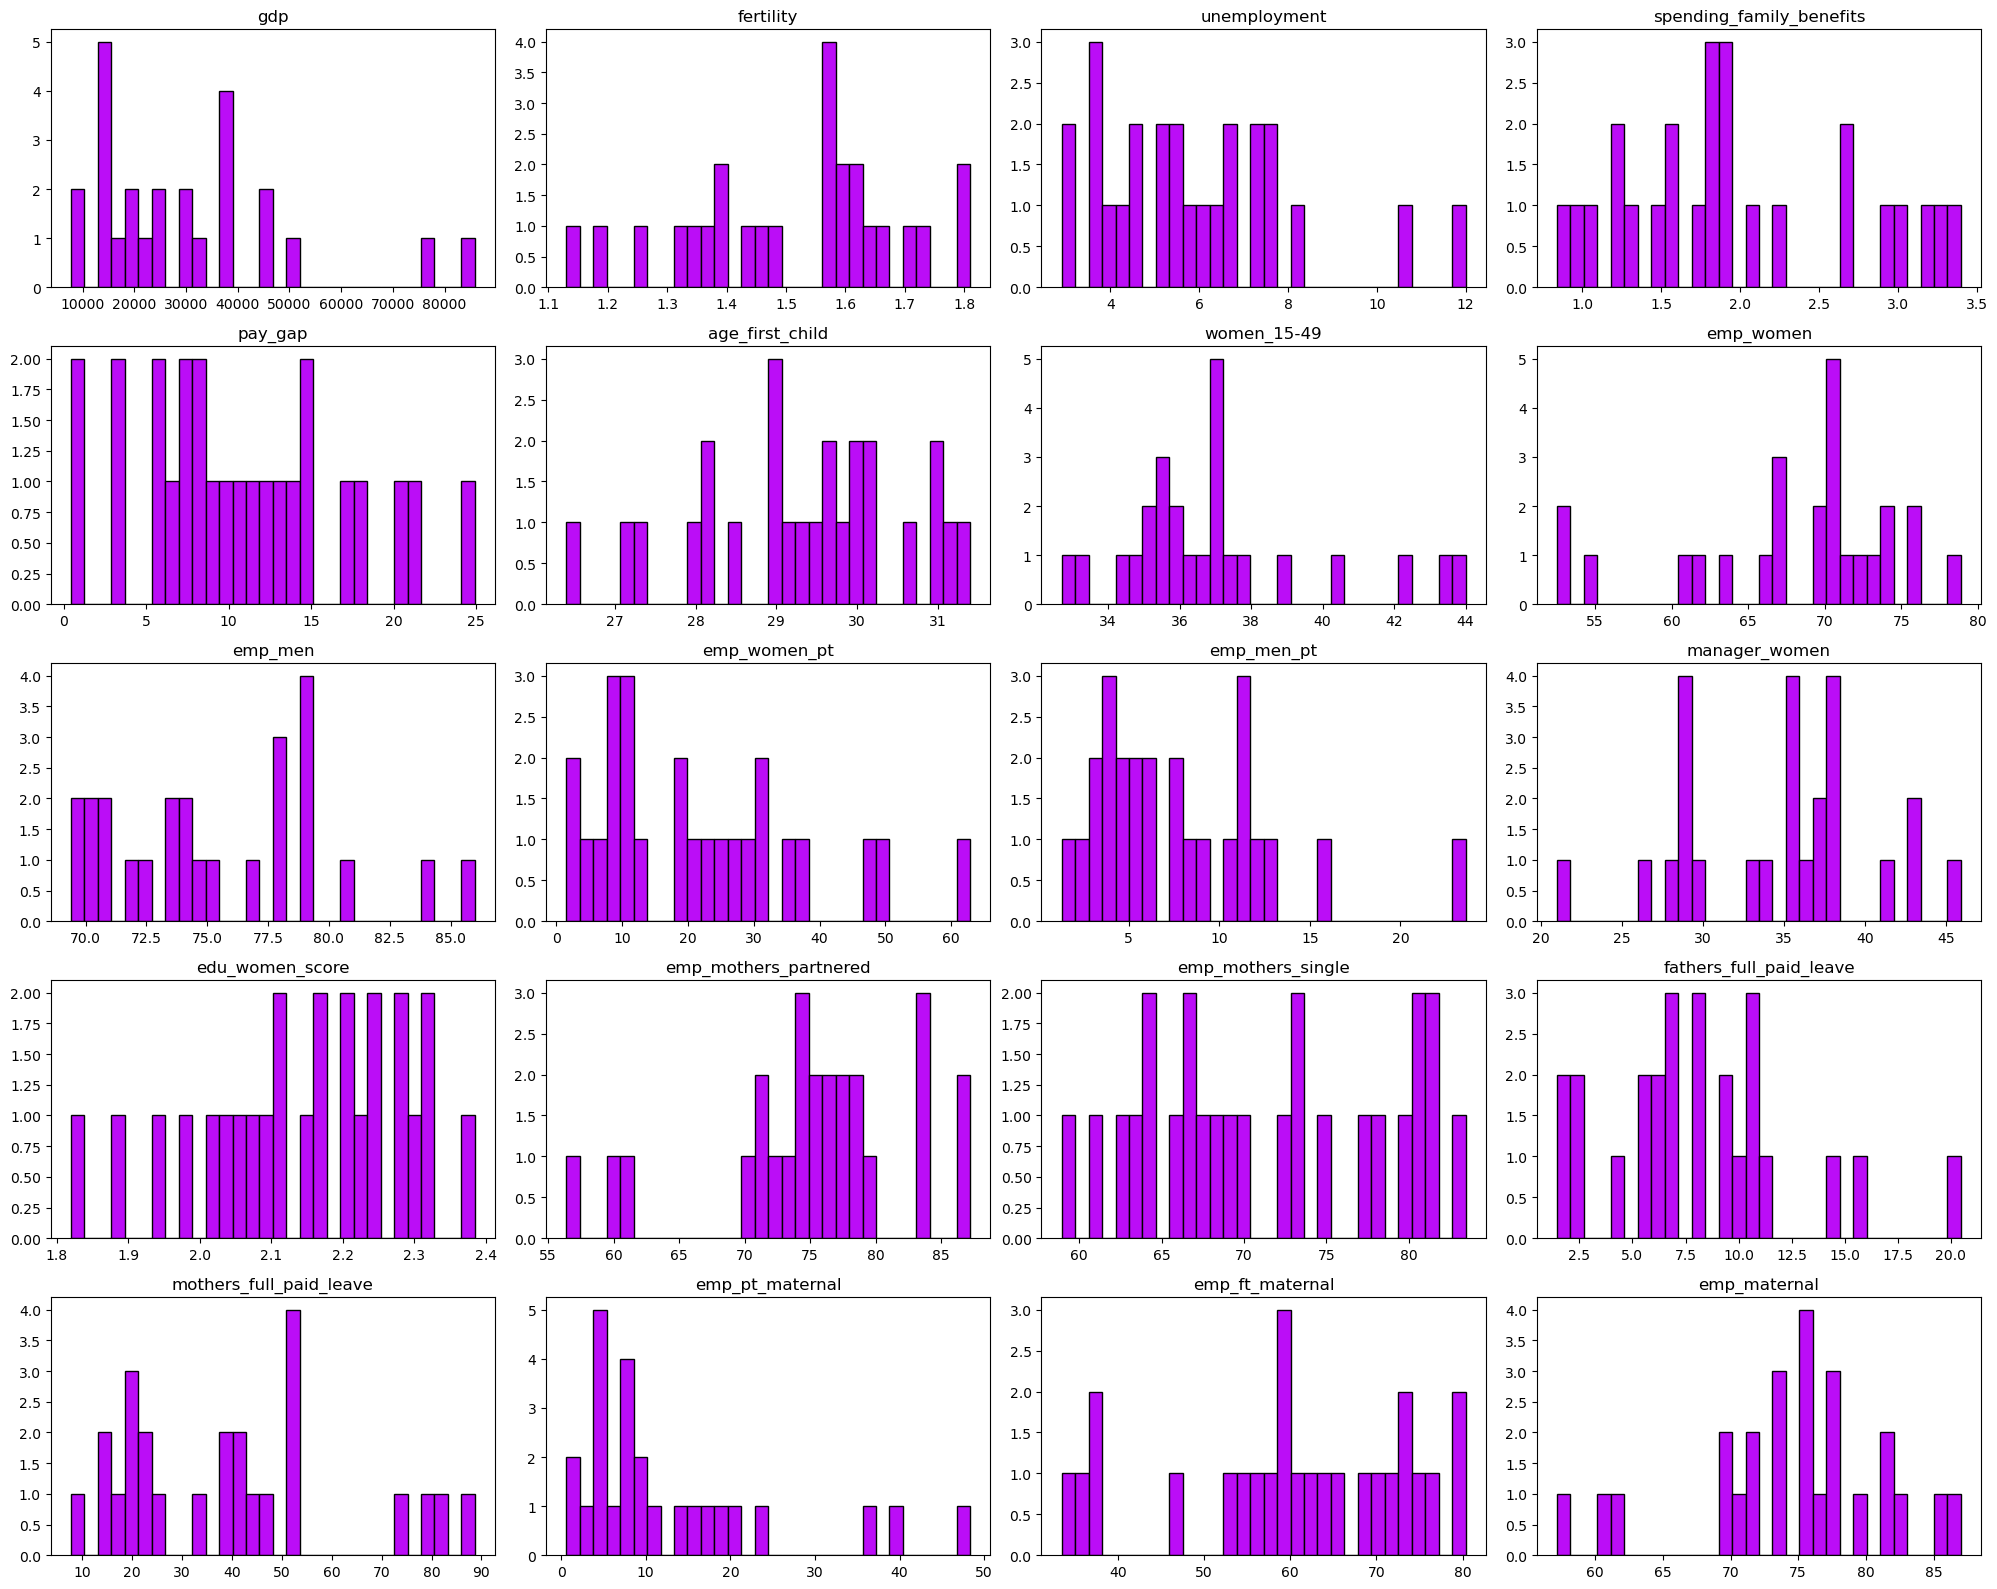

In [146]:
color = '#bb0df7'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

### <span style="color: #ec300e;">Boxplots</span>

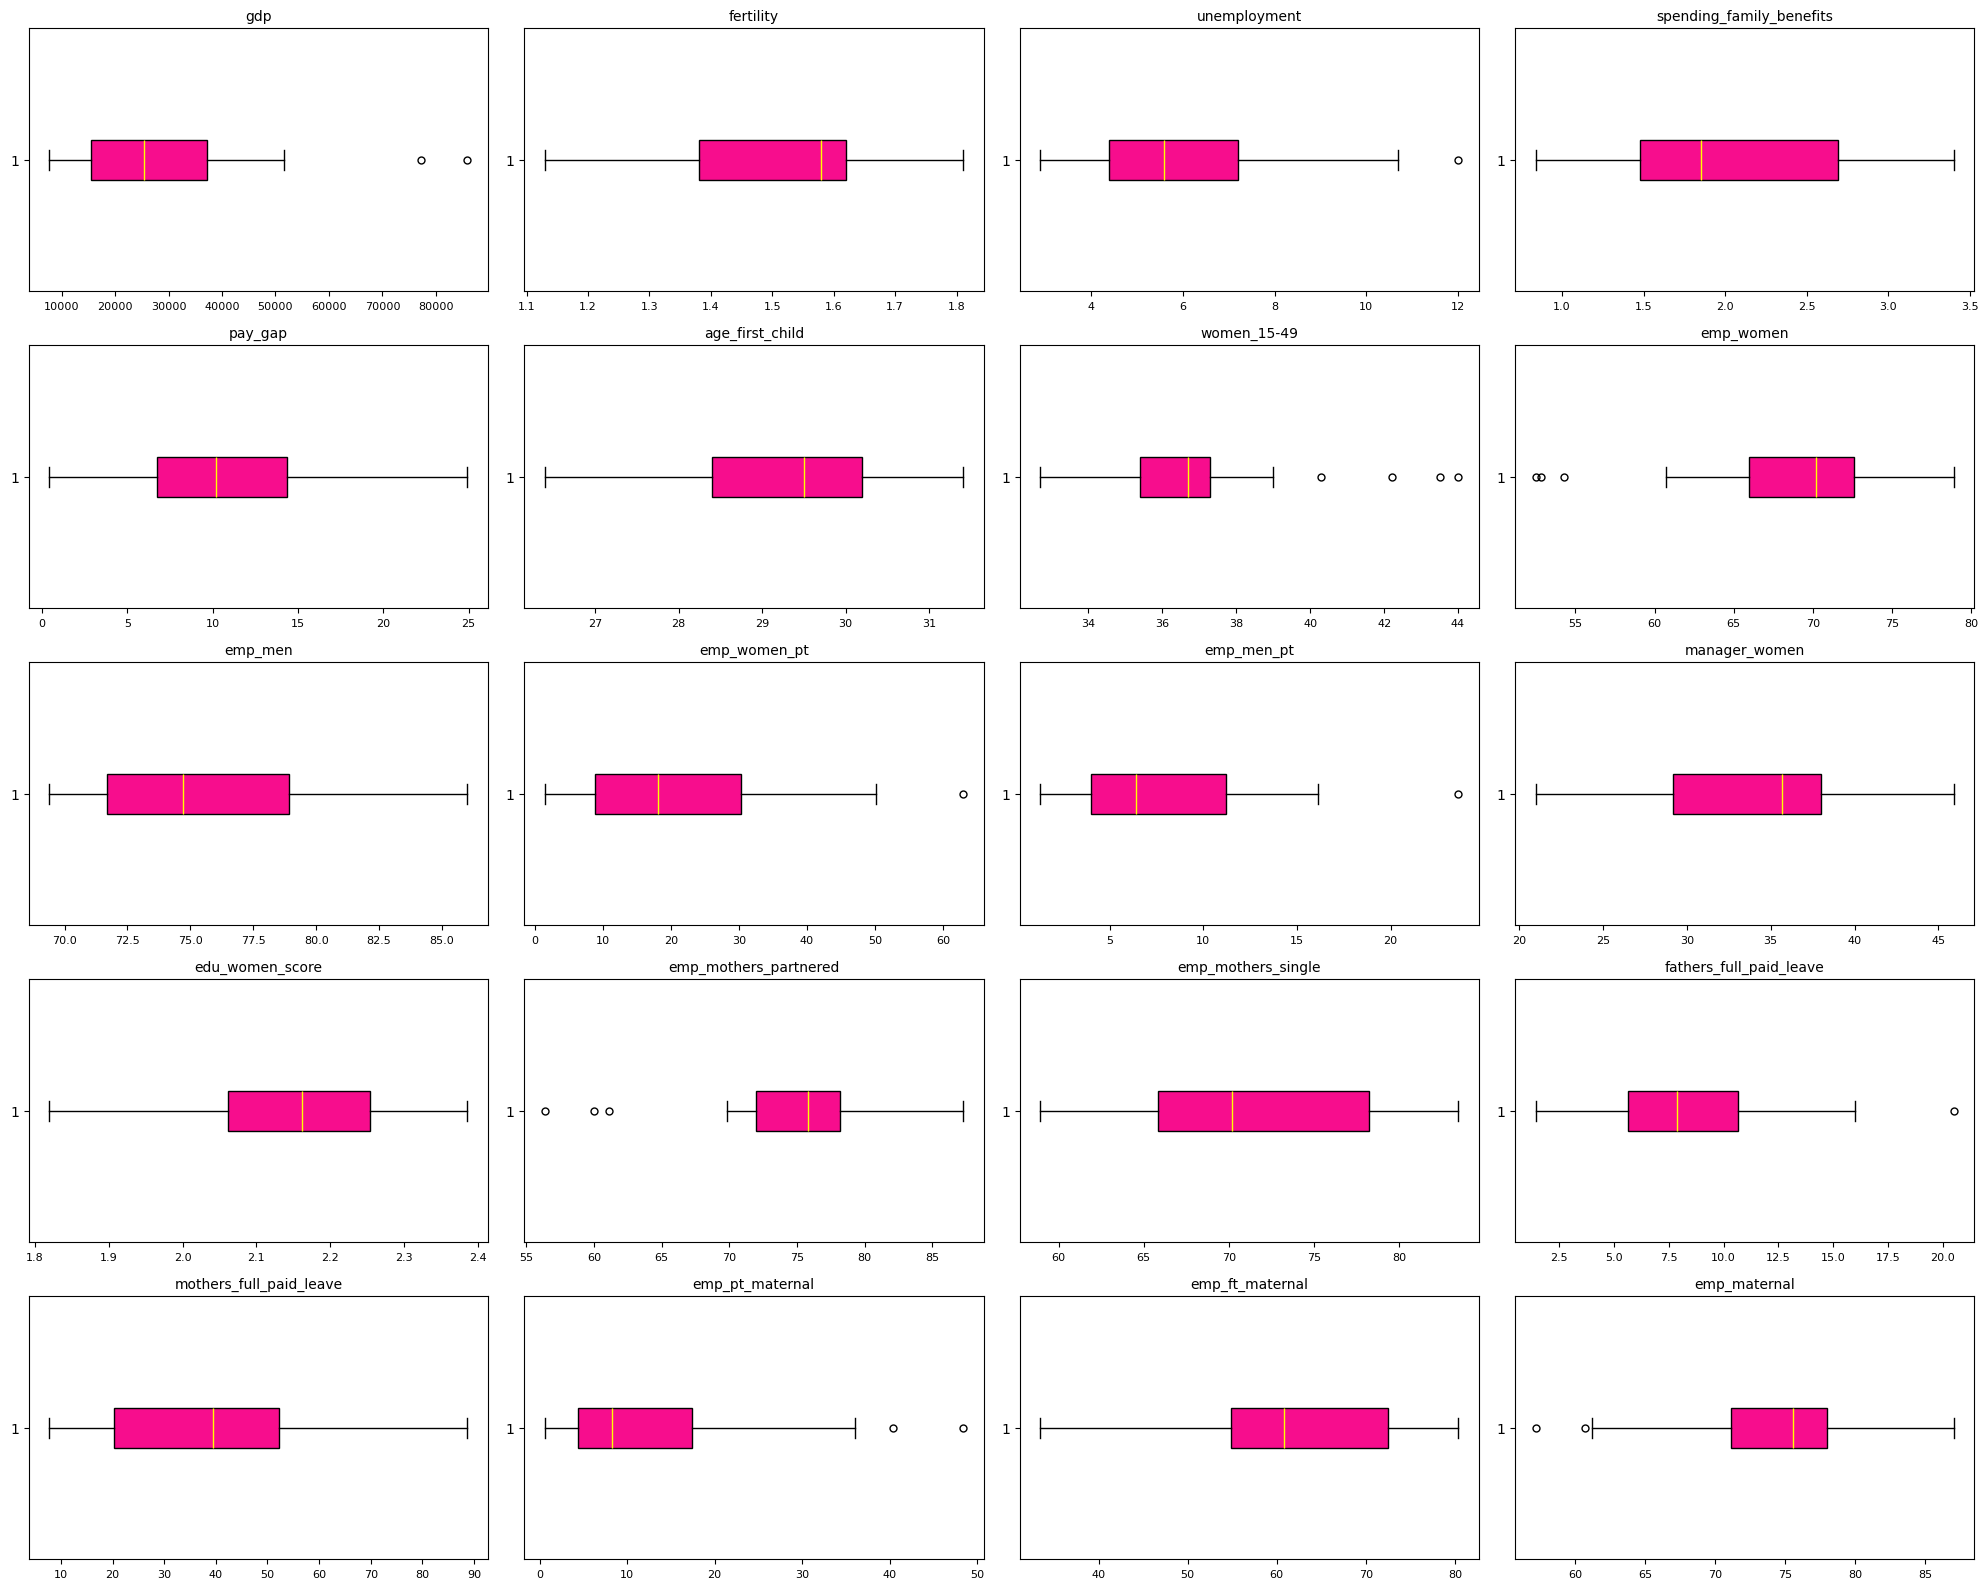

In [147]:
# boxplots for all num columns

color = '#f70d8d'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
<strong>Summarizing Conclusions from Measures, Histograms, and Boxplots:</strong>
<ul>
    <li><strong>Similarities:</strong></li>
    <ul>
        <li>Many variables show a <strong>fairly similar distribution</strong>; none of them are strongly normally distributed, and many are slightly right-skewed.</li>
        <li>Boxplots and histograms confirm that many indicators are <strong>centered around their mean/median values</strong>, though some exhibit significant variations.</li>
        <li>Many variables, including fertility, maternal employment, and family benefits, exhibit distributions that are roughly symmetrical.</li>
    </ul>
    <li><strong>Differences:</strong></li>
    <ul>
        <li>Some variables have a <strong>wide dispersion between countries</strong>, indicating substantial differences, especially in GDP, unemployment, pay gap, paid leave for fathers, employment rate for single mothers, and women in management.</li>
        <li>Histograms reveal that some variables have a <strong>bi- or multimodal distribution</strong>, meaning multiple peaks, which might indicate heterogeneous groups among the countries.</li>
        <li>Several variables are <strong>strongly right-skewed</strong>, suggesting that a few countries have exceptionally high values compared to others.</li>
        <li>Some variables exhibit a <strong>high standard deviation</strong>, further confirming significant differences between countries.</li>
    </ul>
</ul>
</div>

## <span style="color: #ec7511;">Target Variable: "emp_mothers"</span>

In [148]:
emp_maternal_per_country = eu_df.groupby("country")["emp_maternal"].mean().sort_values(ascending=False)
emp_maternal_per_country

country
Slovenia      87.03
Portugal      85.47
Sweden        82.87
Netherlands   81.81
Denmark       81.62
Lithuania     79.35
Luxembourg    77.96
Croatia       77.79
Finland       77.08
Hungary       77.00
Latvia        75.56
Austria       75.56
Belgium       75.53
Estonia       75.23
France        73.86
Germany       73.84
Cyprus        73.18
Ireland       71.34
Bulgaria      71.13
Poland        71.04
Malta         69.75
Spain         69.52
Greece        61.16
Romania       60.70
Italy         57.18
Name: emp_maternal, dtype: float64

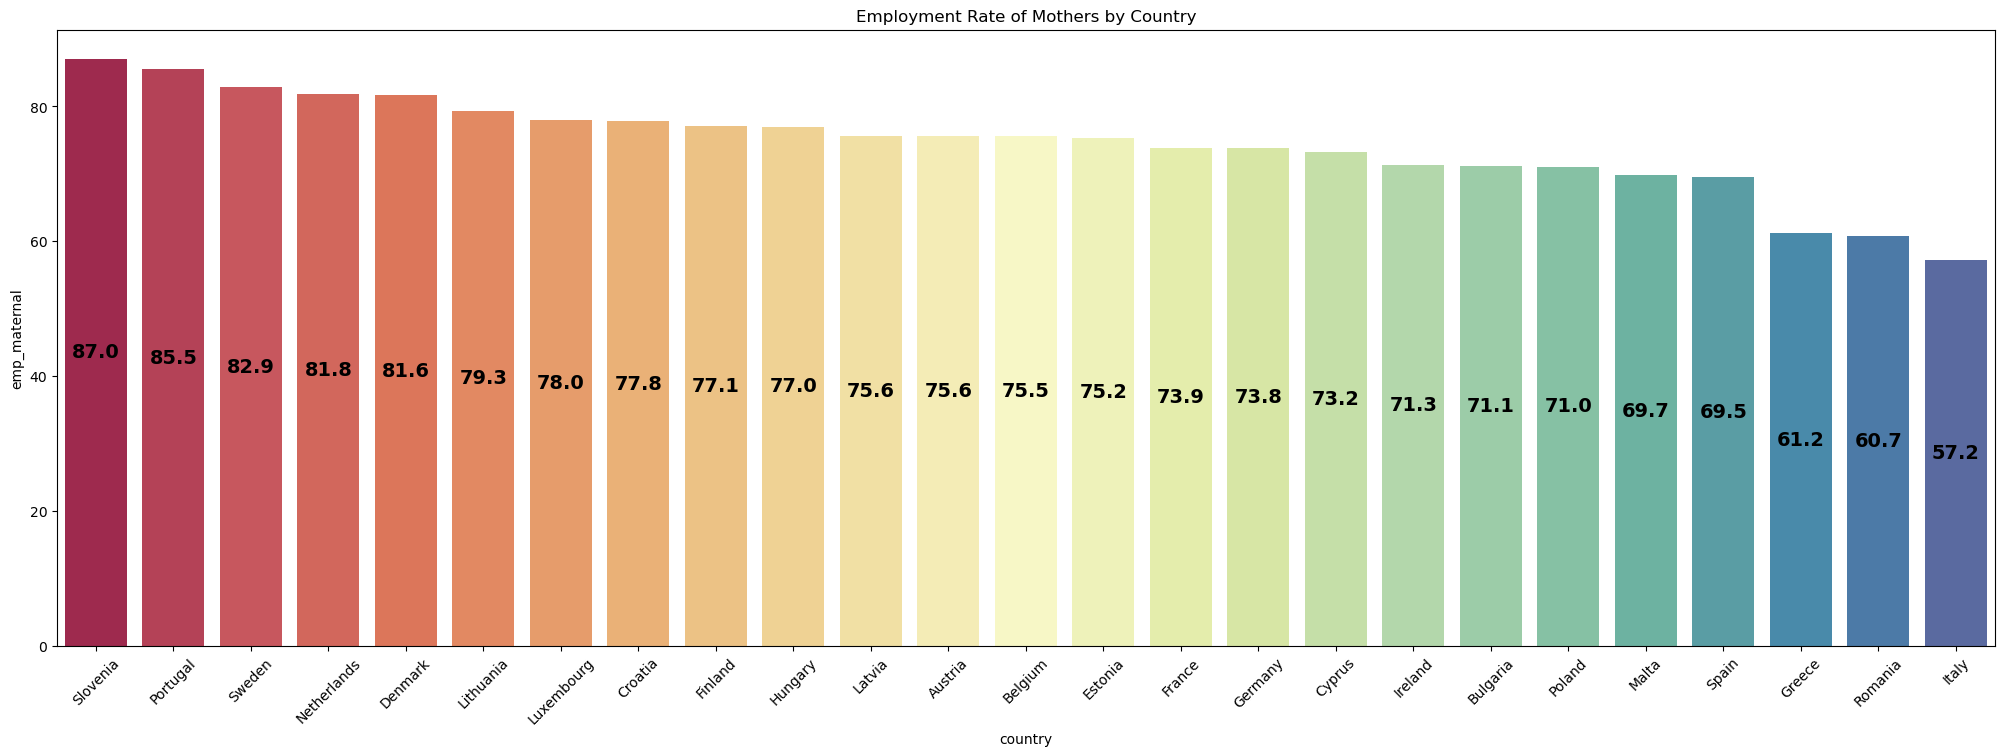

In [149]:
df_emp_maternal_country = eu_df.sort_values(by="emp_maternal", ascending=False)

plt.figure(figsize=(25, 8))
ax = sns.barplot(data=df_emp_maternal_country, x="country", y="emp_maternal", palette="Spectral")

# numbers on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=14, color='black', fontweight='bold', label_type='center')

plt.title('Employment Rate of Mothers by Country')
plt.xticks(rotation=45)
plt.show()


## <span style="color: #ec7511;">Uni- or Bivariate Analysis on Selected Columns</span>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong></strong>
<p>To get a better understanding of differences between the countries, I will do some basic analysis and visualizations of columns regarding differences between men and women in labour market participation or country facts regarding family related parameters.</p>
</div>

### <span style="color: #ec300e;">Fertility Rate per Country</span>

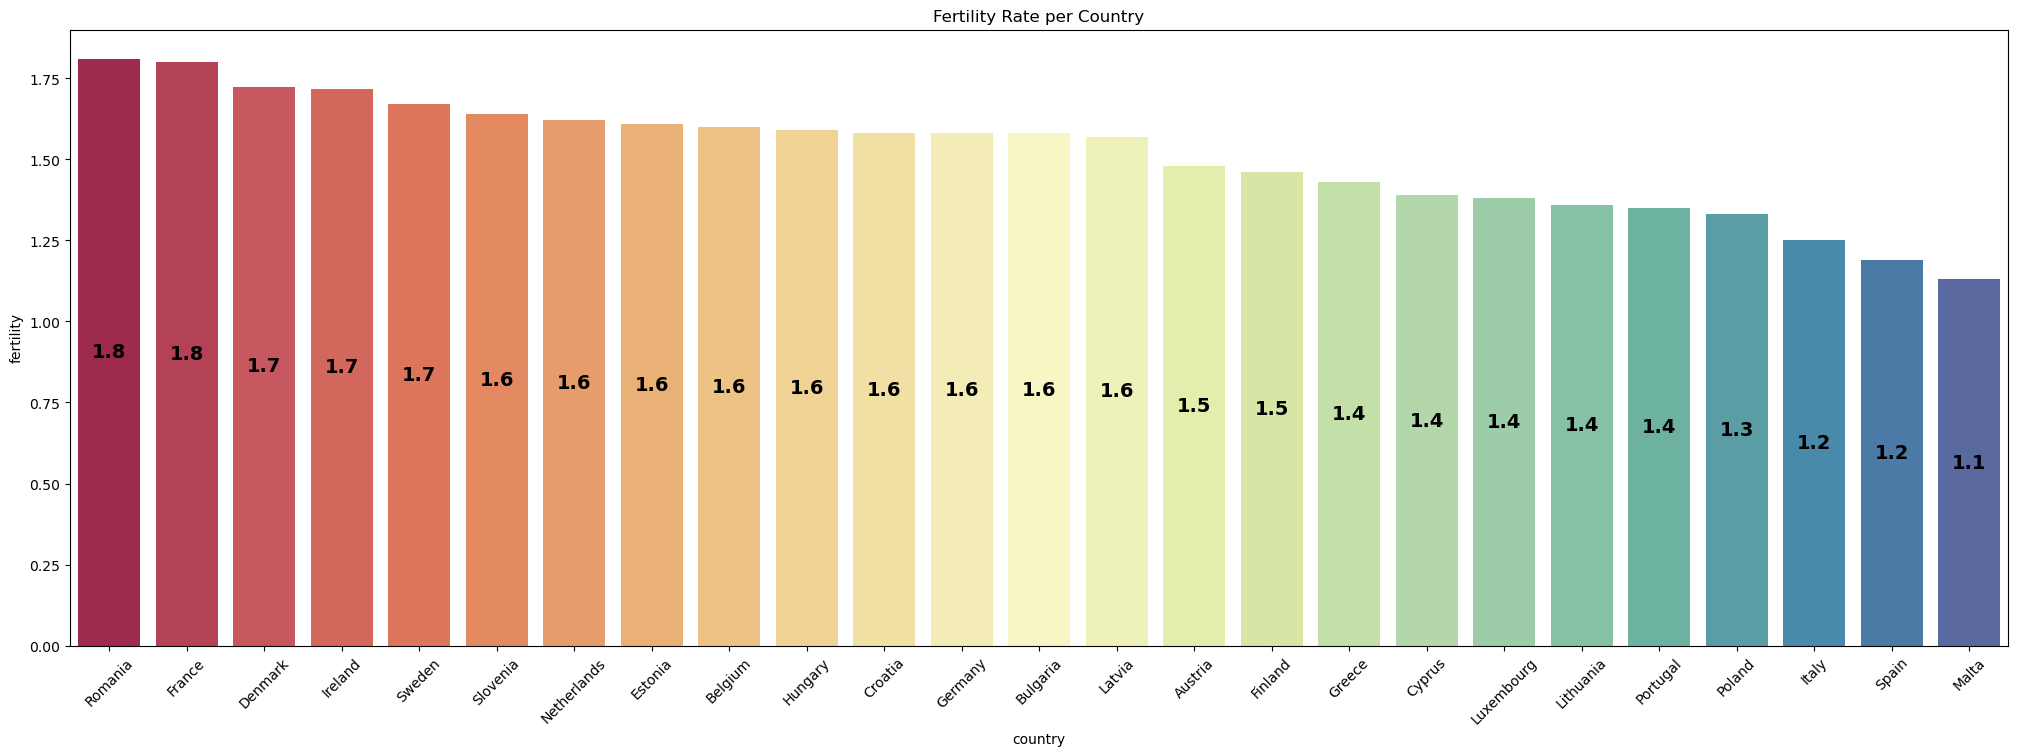

In [150]:
df1 = eu_df.sort_values(by="fertility", ascending=False)

plt.figure(figsize=(25, 8))
ax = sns.barplot(data=df1, x="country", y="fertility", palette="Spectral")

# numbers on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=14, color='black', fontweight='bold', label_type='center')

plt.title('Fertility Rate per Country')
plt.xticks(rotation=45)
plt.show()

### <span style="color: #ec300e;">Gender Pay Gap per Country</span>

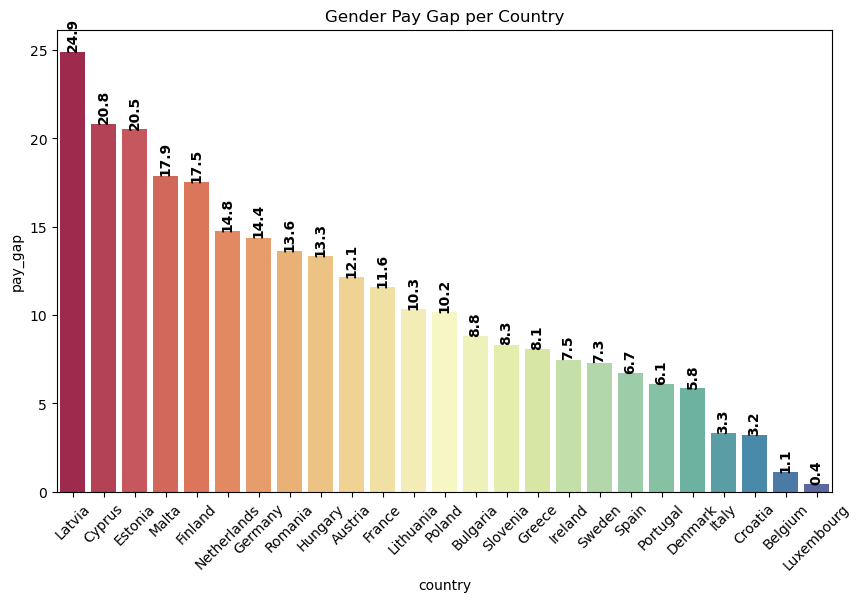

In [151]:
df2 = eu_df.sort_values(by="pay_gap", ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df2, x="country", y="pay_gap", palette="Spectral")

# numbers on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=10, color='black', fontweight='bold', label_type='edge', rotation=90)

plt.title('Gender Pay Gap per Country')
plt.xticks(rotation=45)
plt.show()

### <span style="color: #ec300e;">Age at First Birth</span>

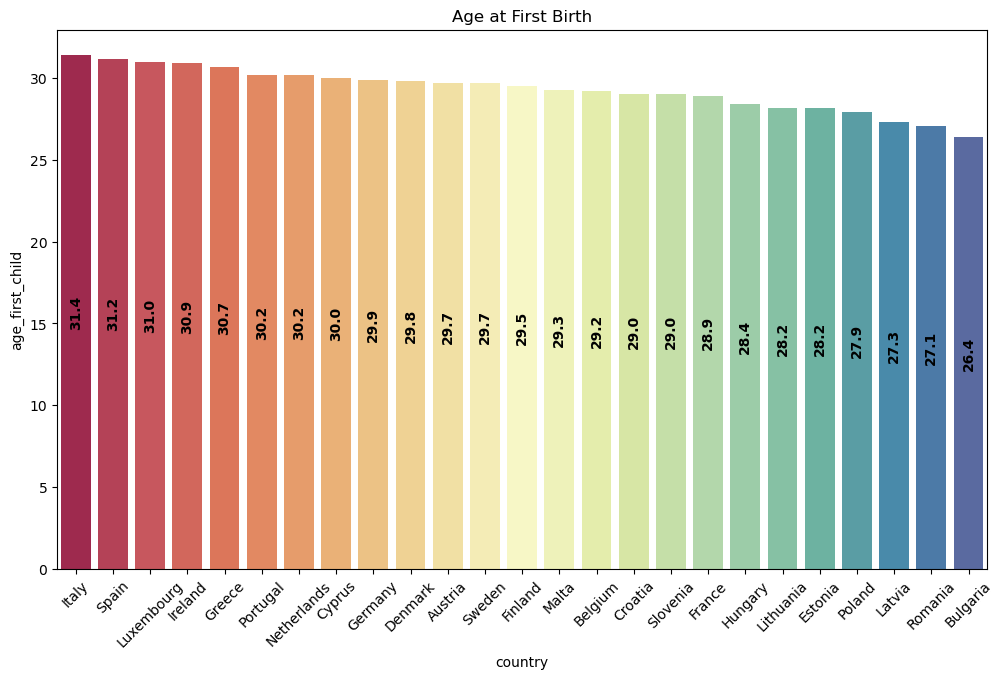

In [152]:
df3 = eu_df.sort_values(by="age_first_child", ascending=False)

plt.figure(figsize=(12,7))
ax = sns.barplot(data=df3, x="country", y="age_first_child", palette="Spectral")

# numbers on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=10, color='black', fontweight='bold', label_type='center', rotation=90)

plt.title('Age at First Birth')
plt.xticks(rotation=45)
plt.show()

### <span style="color: #ec300e;">Difference in Employment Rate between Men and Women</span>

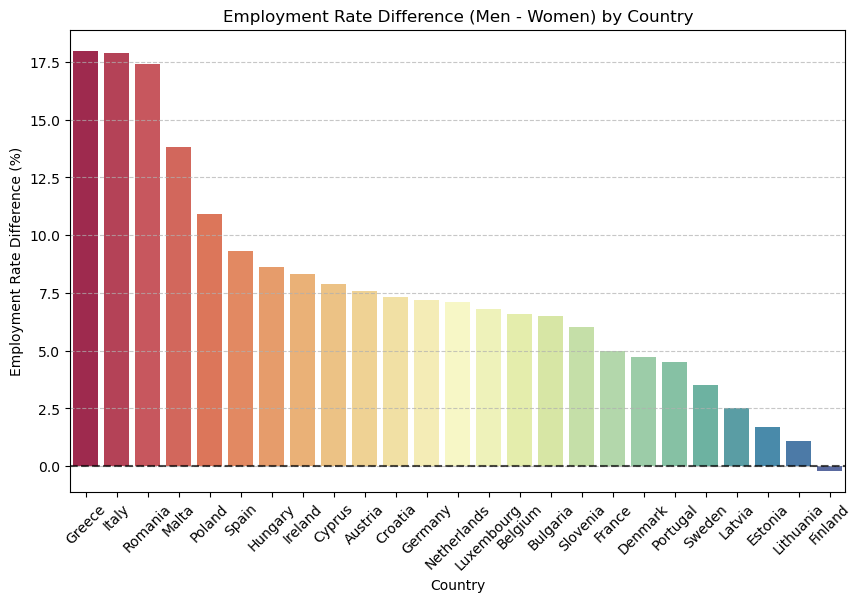

In [153]:
# grouping and calculating the mean of the employment
df_grouped = eu_df.groupby("country")[["emp_women", "emp_men"]].mean()

# calculating the difference between the employment rates
df_grouped["emp_gap"] = df_grouped["emp_men"] - df_grouped["emp_women"]

# sorting the countries by the difference
df_grouped_sorted = df_grouped.sort_values(by="emp_gap", ascending=False)

# barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_grouped_sorted.reset_index(), 
    x="country", 
    y="emp_gap", 
    palette="Spectral"
)

plt.title("Employment Rate Difference (Men - Women) by Country")
plt.xlabel("Country")
plt.ylabel("Employment Rate Difference (%)")
plt.xticks(rotation=45)
plt.axhline(0, color="black", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### <span style="color: #ec300e;">Difference in Part-Time Rat between Men and Women</span>

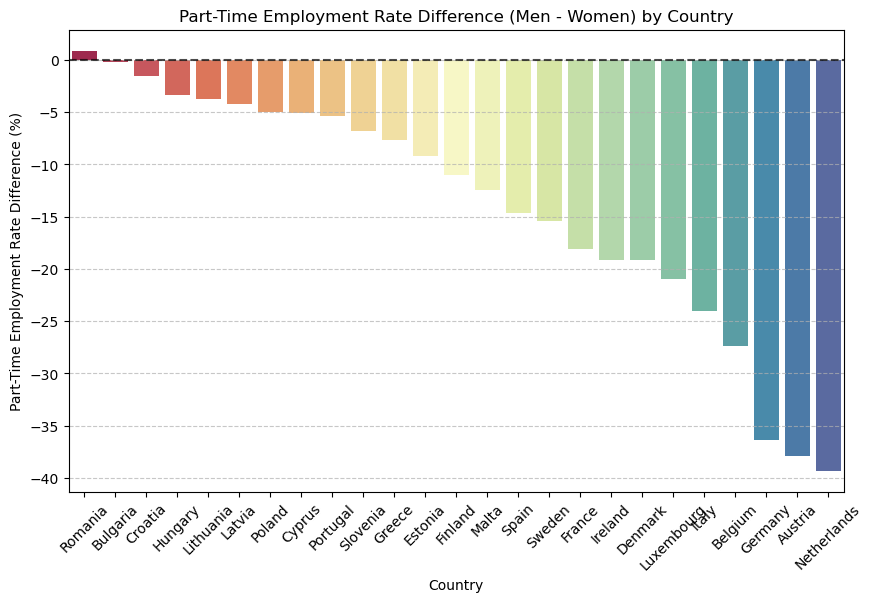

In [154]:
# grouping and calculating the mean of the employment
df_grouped = eu_df.groupby("country")[["emp_men_pt", "emp_women_pt"]].mean()

# calculating the difference between the employment rates
df_grouped["emp_pt_gap"] = df_grouped["emp_men_pt"] - df_grouped["emp_women_pt"]

# sorting the countries by the difference
df_grouped_sorted = df_grouped.sort_values(by="emp_pt_gap", ascending=False)

# barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_grouped_sorted.reset_index(), 
    x="country", 
    y="emp_pt_gap", 
    palette="Spectral"
)

plt.title("Part-Time Employment Rate Difference (Men - Women) by Country")
plt.xlabel("Country")
plt.ylabel("Part-Time Employment Rate Difference (%)")
plt.xticks(rotation=45)
plt.axhline(0, color="black", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### <span style="color: #ec300e;">Difference in Fully Paid Leave between Mothers and Fathers</span>

In [155]:
eu_df.groupby("country")[["fathers_full_paid_leave", "mothers_full_paid_leave"]].max().sort_values(by="fathers_full_paid_leave", ascending=False)

,fathers_full_paid_leave,mothers_full_paid_leave
country,,
Luxembourg,20.49,38.49
Spain,16.00,16.00
Portugal,14.49,22.34
Netherlands,11.35,22.30
Sweden,10.91,34.43
Slovenia,10.71,52.14
Finland,10.67,39.39
Lithuania,9.83,52.49
Austria,9.39,51.20


<Figure size 1200x600 with 0 Axes>

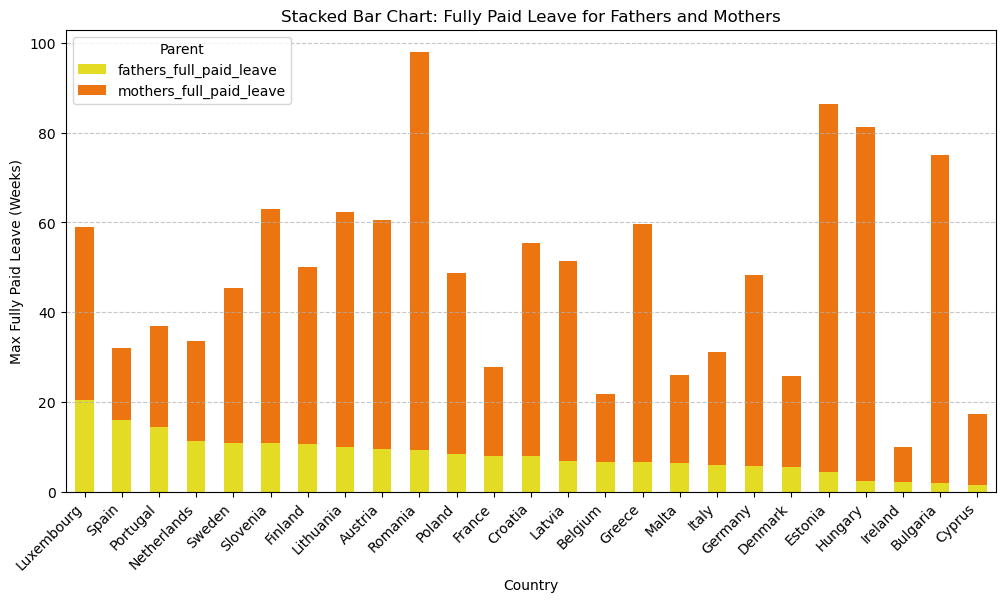

In [156]:
df_max_leave = eu_df.groupby("country")[["fathers_full_paid_leave", "mothers_full_paid_leave"]].max()

df_max_leave_sorted = df_max_leave.sort_values(by="fathers_full_paid_leave", ascending=False)

plt.figure(figsize=(12, 6))

colors = ["#e3db24", "#ec7511"]

df_max_leave_sorted.plot(kind="bar", stacked=True, figsize=(12,6), color=colors)

plt.title("Stacked Bar Chart: Fully Paid Leave for Fathers and Mothers")
plt.xlabel("Country")
plt.ylabel("Max Fully Paid Leave (Weeks)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Parent")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [157]:
eu_df["mothers_full_paid_leave"].corr(eu_df["fathers_full_paid_leave"], method="spearman")


-0.03769230769230769

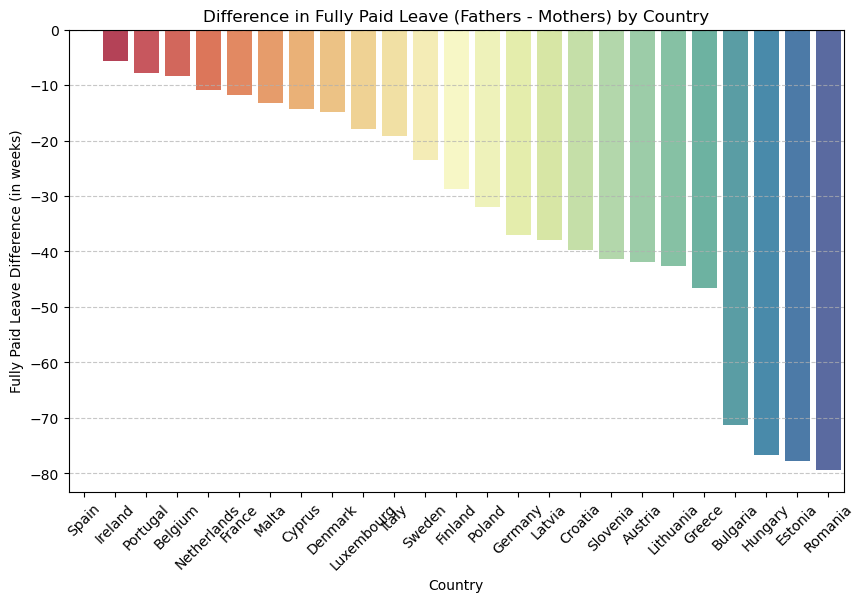

In [158]:
# grouping and calculating the mean of the employment
df_grouped = eu_df.groupby("country")[["fathers_full_paid_leave", "mothers_full_paid_leave"]].mean()

# calculating the difference between the employment rates
df_grouped["paid_leave_gap"] = df_grouped["fathers_full_paid_leave"] - df_grouped["mothers_full_paid_leave"]

# sorting the countries by the difference
df_grouped_sorted = df_grouped.sort_values(by="paid_leave_gap", ascending=False)

# barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_grouped_sorted.reset_index(), 
    x="country", 
    y="paid_leave_gap", 
    palette="Spectral"
)

plt.title("Difference in Fully Paid Leave (Fathers - Mothers) by Country")
plt.xlabel("Country")
plt.ylabel("Fully Paid Leave Difference (in weeks)")
plt.xticks(rotation=45)
plt.axhline(0, color="black", linestyle="--", alpha=0.7)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Conclusions: ...</strong>
<p>TEXT</p>
    <ul>
        <li>TEXT</li>
        <li>TEXT</li>
        <li>TEXT</li>
        <li>TEXT</li>
    </ul>
</div>

## <span style="color: #ec7511;">Correlation Analysis with "emp_maternal"</span>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>First assessment of the relationships of the variables with the target:</strong>
<p>To get a first look at possibly important relationship, I will calculate the correlations of all variables with the target.</p>
</div>

<div style="
    padding: 10px; 
    margin: 10px 0; 
    border: 1px solid #f73f0d; 
    border-radius: 4px; 
    background-color: #ec300e; 
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;">
    <strong>Note:</strong> .The Pearson correlation is not suitable for a small dataset (25 rows) with mostly not normally distributed data. I will therefore not use Pearson but Spearman which is better equipped for this kind of data.
</div>

### <span style="color: #ec300e;">Spearman Correlation: Monotonic Relationships</span>

In [159]:
# spearman correlation with target "emp_maternal"
correlation_matrix_spearman = num.corr(method="spearman")
correlations_spearman = correlation_matrix_spearman["emp_maternal"].drop("emp_maternal")

correlations_spearman_sorted = correlations_spearman.abs().sort_values(ascending=False)

correlations_spearman_sorted


emp_mothers_partnered      0.97
emp_mothers_single         0.78
emp_women                  0.56
emp_ft_maternal            0.53
fathers_full_paid_leave    0.44
edu_women_score            0.40
gdp                        0.28
emp_men_pt                 0.28
fertility                  0.27
emp_men                    0.24
spending_family_benefits   0.22
pay_gap                    0.14
emp_women_pt               0.13
manager_women              0.09
emp_pt_maternal            0.08
unemployment               0.07
women_15-49                0.06
age_first_child            0.03
mothers_full_paid_leave    0.02
Name: emp_maternal, dtype: float64

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Subset:</strong>
<p>Partly based on the above correlation analysis, I will now formulate hypotheses for further exploratory analysis and create a subset with variables needed for the hypotheses analysis. I will only formulate hypotheses on specific questions and not on all the possibly influential variables because some of them are control variables (i.e. GDP, overall unemployment, fertility) which I will mainly use for the regression analysis.</p>
</div>

## <span style="color: #ec7511;">Hypotheses</span>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
<strong>Hypotheses:</strong>
<p>After cleaning the data, I will analyze the following hypotheses, solely using EDA. The hypotheses were created following some research and also the analysts interests and assumptions. They naturally present a limitation because not all data can be analysed right now. Yet, I did try to find an interesting and also promising set of hyptheses.</p>
<ul>
    <li><strong>H1:</strong> Countries with higher public spending on family benefits have a higher maternal employment rate.</li>
    <li><strong>H2:</strong> Mothers in partnerships have a higher employment rate than single mothers. This difference is smaller in countries with higher spending on family benefits.</li>
    <li><strong>H3:</strong> Countries with longer fully paid parental leave for fathers have a higher maternal employment rate.</li>
    <li><strong>H4:</strong> The higher the education level of women in a country, the higher the maternal employment rate.</li>
    <li><strong>H5:</strong> Countries with a higher proportion of female managers have higher maternal employment rates.</li>
    <li><strong>H6:</strong> In countries where more men work part-time, maternal employment rates are higher.</li>
    <li><strong>H7:</strong> In countries with a lower gender pay-gap, maternal employment rates are higher.</li>
</ul>
</div>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Selecting Data</strong>
<p>To analyse the above hypotheses, some of the columns are not needed. For the following EDA, I will create new df which only contains the data needed for analysing the hypotheses.</p>
</div>

In [160]:
eda_df = eu_df[['country', 'emp_maternal', 'spending_family_benefits',
                'fathers_full_paid_leave', 'emp_mothers_partnered', 'emp_mothers_single',
                "edu_women_score", "edu_women_cat", 'manager_women', 'emp_men_pt', 'pay_gap',
]]

eda_df.shape

(25, 11)

In [161]:
eda_df.columns

Index(['country', 'emp_maternal', 'spending_family_benefits',
       'fathers_full_paid_leave', 'emp_mothers_partnered',
       'emp_mothers_single', 'edu_women_score', 'edu_women_cat',
       'manager_women', 'emp_men_pt', 'pay_gap'],
      dtype='object')

### <span style="color: #ec300e;">Hypothesis 1: </span>
<p>Countries with higher public spending on family benefits have a higher maternal employment rate.</p>

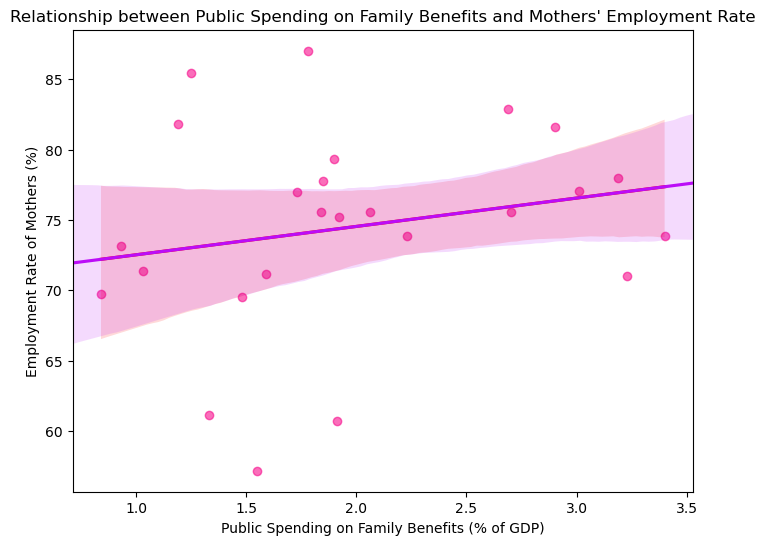

In [162]:
# scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=eda_df, x="spending_family_benefits", y="emp_maternal",
            scatter_kws={"color": "#f70d8d", 'alpha':0.6}, line_kws={'color':'red'})

# coloring confidence interval
sns.regplot(data=eda_df, x="spending_family_benefits", y="emp_maternal",
            scatter=False, line_kws={'color': '#bb0df7'},
            ci=95, truncate=False)

# labels
plt.xlabel("Public Spending on Family Benefits (% of GDP)")
plt.ylabel("Employment Rate of Mothers (%)")
plt.title("Relationship between Public Spending on Family Benefits and Mothers' Employment Rate")

plt.show()



In [163]:
eda_df["spending_family_benefits"].corr(eda_df["emp_maternal"], method="spearman")

0.21538461538461537

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>H1: Weak relationship</strong>
<p>Public spending on family benefits might have an influence on a higher maternal employment rate but the effect is weak and not unambiguous.</p>
    <ul>
        <li>The scatterplot with the regression line shows a weak positive relationship.</li>
        <li>Alsot the correlation is weakly positive.</li>
        <li>Yet the dispersion of the data points is great which definitely indicates other more important factors.</li>
    </ul>
</div>

### <span style="color: #ec300e;">Hypothesis 2: </span>
<p>Mothers in partnerships have a higher employment rate than single mothers. This difference is smaller in countries with higher spending on family benefits.</p>

#### <span style="color: #bb1010;">Histrogram to Compare Employment Rates of Single vs. Partnered Mothers</span>

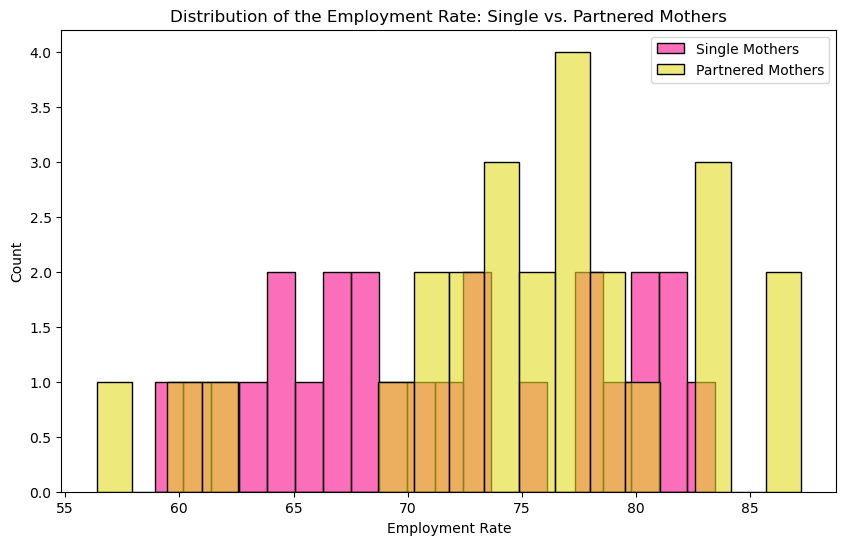

In [164]:
plt.figure(figsize=(10,6))

# Histogramme für beide Gruppen mit Transparenz
sns.histplot(eda_df["emp_mothers_single"], bins=20, color="#f70d8d", label="Single Mothers", alpha=0.6)
sns.histplot(eda_df["emp_mothers_partnered"], bins=20, color="#e3db24", label="Partnered Mothers", alpha=0.6)

plt.xlabel("Employment Rate")
plt.ylabel("Count")
plt.title("Distribution of the Employment Rate: Single vs. Partnered Mothers")
plt.legend()
plt.show()

#### <span style="color: #bb1010;">Boxplot: Employment Rate of Single/ Partnered Mother by Spending on Family Benefits</span>

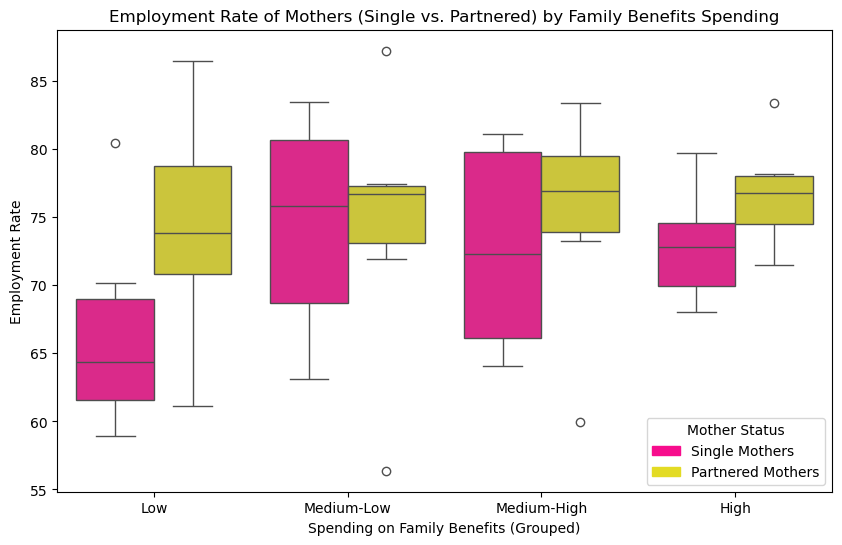

In [ ]:
# creating categories for the spending on family benefits
eda_df['spending_category'] = pd.qcut(eda_df['spending_family_benefits'], q=4,
                                      labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=eda_df.melt(id_vars=['spending_category'], 
                                  value_vars=['emp_mothers_single', 'emp_mothers_partnered']),
                 x='spending_category', y='value', hue='variable', 
                 palette=['#f70d8d', '#e3db24'])

# manually set legend with custom colors
legend_patches = [
    mpatches.Patch(color='#f70d8d', label="Single Mothers"),
    mpatches.Patch(color='#e3db24', label="Partnered Mothers")
]

plt.xlabel("Spending on Family Benefits (Grouped)")
plt.ylabel("Employment Rate")
plt.title("Employment Rate of Mothers (Single vs. Partnered) by Family Benefits Spending")
plt.legend(handles=legend_patches, title="Mother Status")
plt.show()

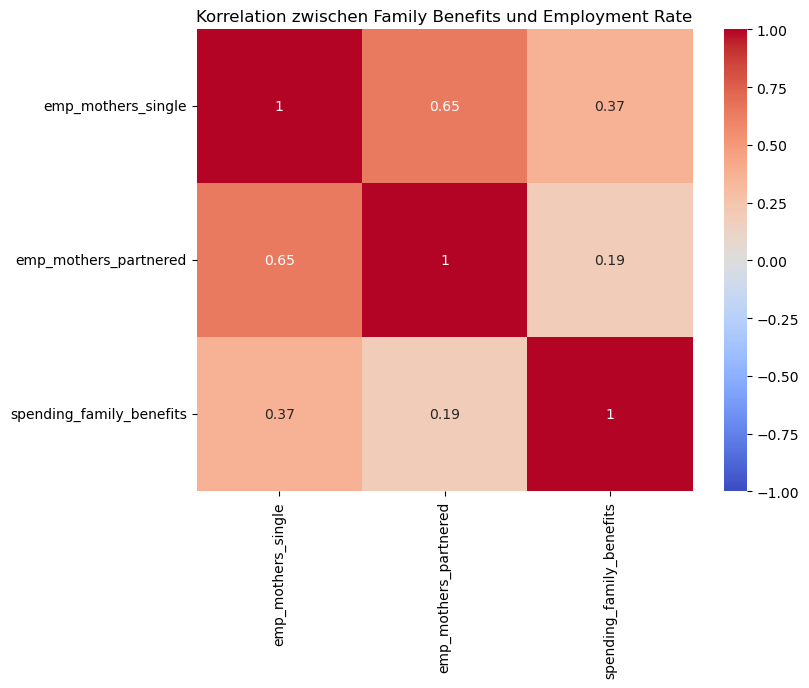

In [166]:
# Spearman correlation matrix for not normally distributed data
plt.figure(figsize=(8, 6))
sns.heatmap(eda_df[["emp_mothers_single", "emp_mothers_partnered", "spending_family_benefits"]].corr(method="spearman"), 
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korrelation zwischen Family Benefits und Employment Rate")
plt.show()

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>H2: Confirmed</strong>
<p>Partnered mothers have a higher employment rate than single mothers. The amount of public spending on family has an influence on the difference.</p>
    <ul>
        <li>The histogram confirms that partnered mothers do have a higher employment rate. The dispersion of the employment rates of single mothers is greater and overall lower.</li>
        <li>The boxplot shows that the higher the spending on family benefits, the smaller the difference between partnered and single mothers.</li>
        <li>In countries with lower spending on family benefits, the employment rate of single mothers also is significantly lower.</li>
        <li>In countries with high public spending, the employment rates of single and partnered mothers converge.</li>
        <li>The corelation matrix shows that the relationship between the two employment rates is strong: Countries with a higher employment rate for one group, also has a higher one for the other. The spending on family benefits has a greater influence on single mothers than on partnered mothers which strengthens the findings from before.</li>
    </ul>
</div>

### <span style="color: #ec300e;">Hypothesis 3: </span>
<p>Countries with longer fully paid parental leave for fathers have a higher maternal employment rate.</p>

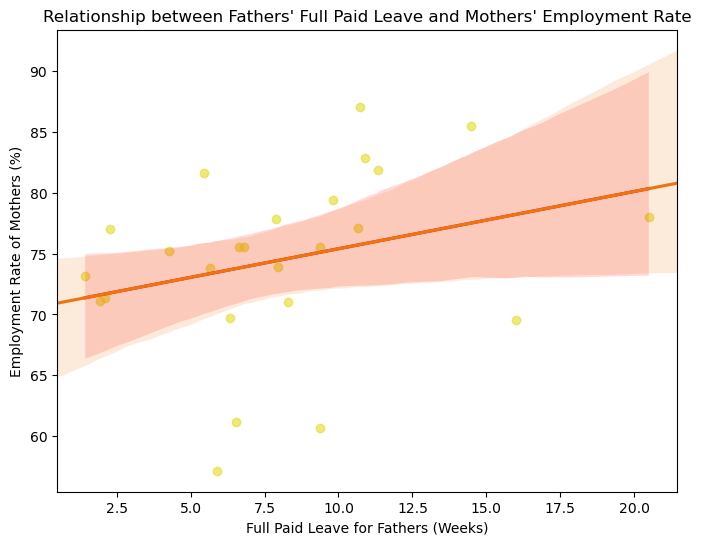

In [167]:
# scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=eda_df, x="fathers_full_paid_leave", y="emp_maternal",
            scatter_kws={"color": "#e3db24", 'alpha':0.6}, line_kws={'color':'red'})

# coloring confidence interval
sns.regplot(data=eda_df, x="fathers_full_paid_leave", y="emp_maternal",
            scatter=False, line_kws={'color': '#ec7511'},
            ci=95, truncate=False)

# labels
plt.xlabel("Full Paid Leave for Fathers (Weeks)")
plt.ylabel("Employment Rate of Mothers (%)")
plt.title("Relationship between Fathers' Full Paid Leave and Mothers' Employment Rate")

plt.show()

In [168]:
eda_df["fathers_full_paid_leave"].corr(eda_df["emp_maternal"], method="spearman")

0.43769230769230766

In [186]:
# only to compare
eda_df["fathers_full_paid_leave"].corr(eda_df["emp_maternal"])

0.29198687548991237

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>H3: Confirmed (moderate relationship)</strong>
<p>Longer paternal leave is related to a higher maternal employment rate, yet the relationship is not very strong.</p>
    <ul>
        <li>The scatterplot shows a weak positive relationship, yet it also shows a great dispersion in the data points which indicates other more important factors.</li>
        <li>The monotonic correlation is moderately positive and higher than the linear one.</li>
        <li>TEXT</li>
    </ul>
</div>

### <span style="color: #ec300e;">Hypothesis 4: </span>
<p>The higher the education level of women in a country, the higher the maternal employment rate.</p>

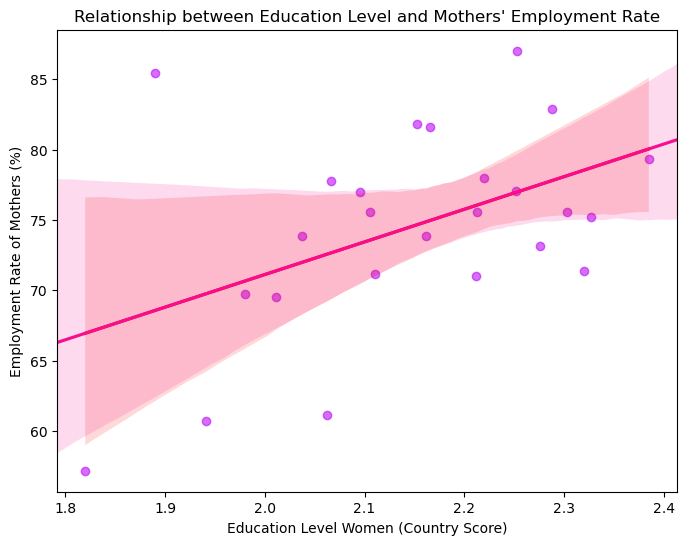

In [169]:
# scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=eda_df, x="edu_women_score", y="emp_maternal",
            scatter_kws={"color": "#bb0df7", 'alpha':0.6}, line_kws={'color':'red'})

# coloring confidence interval
sns.regplot(data=eda_df, x="edu_women_score", y="emp_maternal",
            scatter=False, line_kws={'color': '#f70d8d'},
            ci=95, truncate=False)

# labels
plt.xlabel("Education Level Women (Country Score)")
plt.ylabel("Employment Rate of Mothers (%)")
plt.title("Relationship between Education Level and Mothers' Employment Rate")

plt.show()

In [170]:
eda_df["edu_women_score"].corr(eda_df["emp_maternal"], method="spearman")

0.40307692307692305

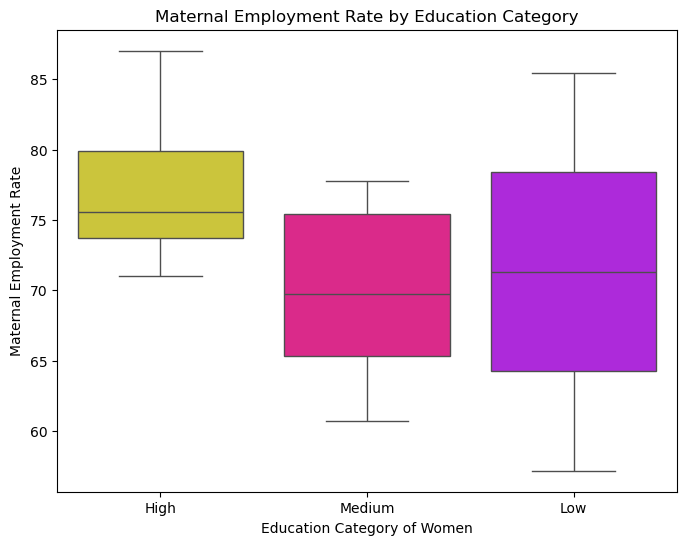

In [190]:
plt.figure(figsize=(8,6))
sns.boxplot(x="edu_women_cat", y="emp_maternal", data=eda_df, order=["High", "Medium", "Low"],
            palette={"Low": "#bb0df7", "Medium": "#f70d8d", "High": "#e3db24"})
plt.xlabel("Education Category of Women")
plt.ylabel("Maternal Employment Rate")
plt.title("Maternal Employment Rate by Education Category")
plt.show()

In [189]:
eda_df.groupby("edu_women_cat")["emp_maternal"].mean().sort_values(ascending=False)

edu_women_cat
High     76.89
Low      71.32
Medium   69.97
Name: emp_maternal, dtype: float64

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>H4: Partly confirmed</strong>
<p>A high education level seems to lead to a higher employment rate but there is variability especially regarding the medium and low education levels.</p>
    <ul>
        <li>The scatterplot shows a positive relationship: Countries with a higher education level of women tend to have higher maternal employment rates. The correlation calculation supports this moderate positive relationship.</li>
        <li>But there is a certain degree of dispersion, especially for the lower and middle education levels which indicates other important factors.</li>
        <li>Boxplot and mean comparison: Here we can see that the three education categories behave differently: Whereas a higher education level throughout shows a higher maternal employment, the medium level shows a greater dispersion and the mean maternal employment is lower than for the low education level. For the lowest education level the dispersion is the greatest.</li>
    </ul>
</div>

hier noch mal überlegen, was möglicher gründe für das ergebnis bzgl. medium-low sein könnten

### <span style="color: #ec300e;">Hypothesis 5: </span>
<p>Countries with a higher proportion of female managers have higher maternal employment rates.</p>

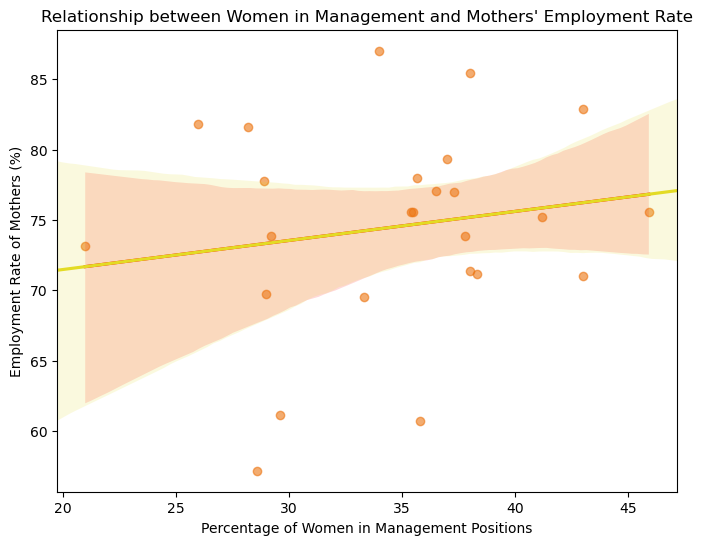

In [172]:
# scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=eda_df, x="manager_women", y="emp_maternal",
            scatter_kws={"color": "#ec7511", 'alpha':0.6}, line_kws={'color':'red'})

# coloring confidence interval
sns.regplot(data=eda_df, x="manager_women", y="emp_maternal",
            scatter=False, line_kws={'color': '#e3db24'},
            ci=95, truncate=False)

# labels
plt.xlabel("Percentage of Women in Management Positions")
plt.ylabel("Employment Rate of Mothers (%)")
plt.title("Relationship between Women in Management and Mothers' Employment Rate")

plt.show()


In [173]:
eda_df["manager_women"].corr(eda_df["emp_maternal"], method="spearman")

0.09041939876684763

In [191]:
eda_df["manager_women"].corr(eda_df["emp_maternal"])

0.16794774631426224

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>H5: Not confirmed</strong>
<p>There only is a very weak correlation between the share of women in management positions and the maternal employment rate.</p>
    <ul>
        <li>The scatterplot seems to indicate that countries with more women managers have a very slightly higher maternal employment.</li>
        <li>Yet the dispersion is so great that this cannot be an important factor.</li>
        <li>The correlation analysis supports this: both indices are very low (and the Pearson index also has to be regarded only carefully because of the little amount of data analyzed).</li>
    </ul>
</div>

### <span style="color: #ec300e;">Hypothesis 6: </span>
<p>In countries where more men work part-time, maternal employment rates are higher.</p>

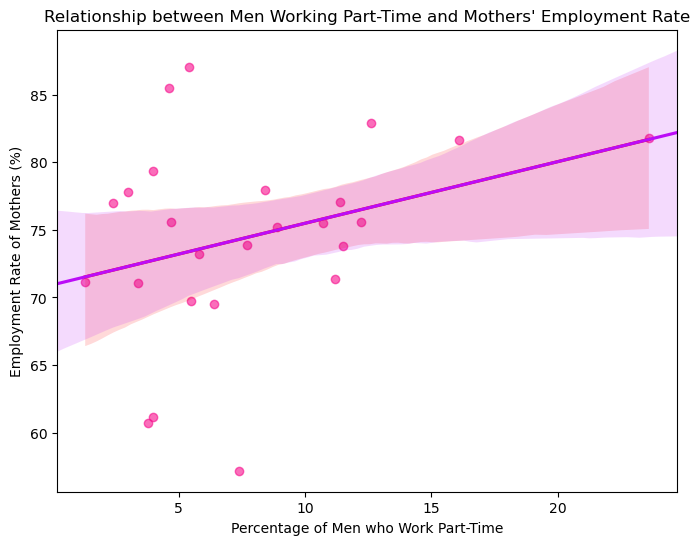

In [176]:
# scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=eda_df, x="emp_men_pt", y="emp_maternal",
            scatter_kws={"color": "#f70d8d", 'alpha':0.6}, line_kws={'color':'red'})

# coloring confidence interval
sns.regplot(data=eda_df, x="emp_men_pt", y="emp_maternal",
            scatter=False, line_kws={'color': '#bb0df7'},
            ci=95, truncate=False)

# labels
plt.xlabel("Percentage of Men who Work Part-Time")
plt.ylabel("Employment Rate of Mothers (%)")
plt.title("Relationship between Men Working Part-Time and Mothers' Employment Rate")

plt.show()

In [179]:
eda_df["emp_men_pt"].corr(eda_df["emp_maternal"], method="spearman")

0.2750528998754532

In [192]:
eda_df["emp_men_pt"].corr(eda_df["emp_maternal"])

0.31517127366527514

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>H6: Confirmed (moderate relationship)</strong>
<p>The part-time rate of mean has a moderate positive relationship with the maternal employment rate.</p>
    <ul>
        <li>The scatterplot shows a positve relationship: the more men work part-time, the higher the maternal employment rate tends to be.</li>
        <li>The dispersion of the data points is moderate but shows a clear correlation.</li>
        <li>The correlation analysis shows that the correlation is not very strong, so there are other more important factors.</li>
    </ul>
</div>

### <span style="color: #ec300e;">Hypothesis 7: </span>
<p>In countries with a lower gender pay-gap, maternal employment rates are higher.</p>

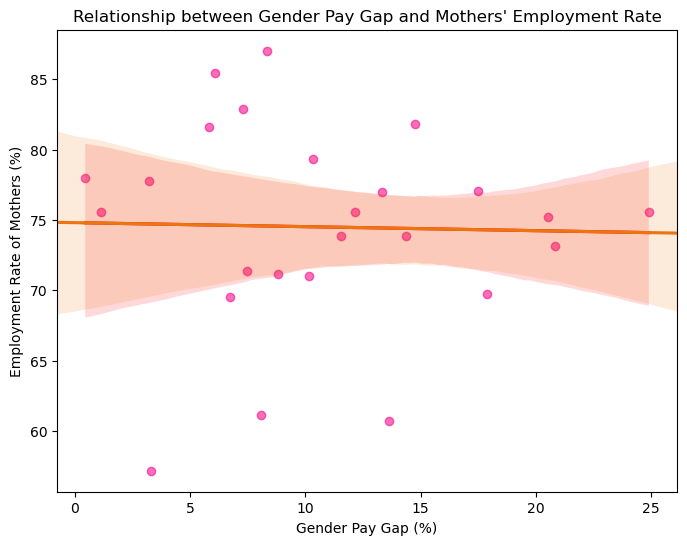

In [180]:
# scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=eda_df, x="pay_gap", y="emp_maternal",
            scatter_kws={"color": "#f70d8d", 'alpha':0.6}, line_kws={'color':'red'})

# coloring confidence interval
sns.regplot(data=eda_df, x="pay_gap", y="emp_maternal",
            scatter=False, line_kws={'color': '#ec7511'},
            ci=95, truncate=False)

# labels
plt.xlabel("Gender Pay Gap (%)")
plt.ylabel("Employment Rate of Mothers (%)")
plt.title("Relationship between Gender Pay Gap and Mothers' Employment Rate")

plt.show()

In [181]:
eda_df["pay_gap"].corr(eda_df["emp_maternal"], method="spearman")

-0.1392307692307692

In [193]:
eda_df["pay_gap"].corr(eda_df["emp_maternal"])

-0.024681241126400556

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>H7: Not confirmed</strong>
<p>There seems to be no influence of the gender pay gap on the maternal employment rate.</p>
    <ul>
        <li>The scatterplot shows no relationship and the dispersion of data points is great.</li>
        <li>The correlation indices show a very weak negative correlation: a smaller pay gap goes along with a higher maternal employment. But it is only very weak.</li>
    </ul>
</div>

## <span style="color: #ec7511;">Multicollinearity</span>

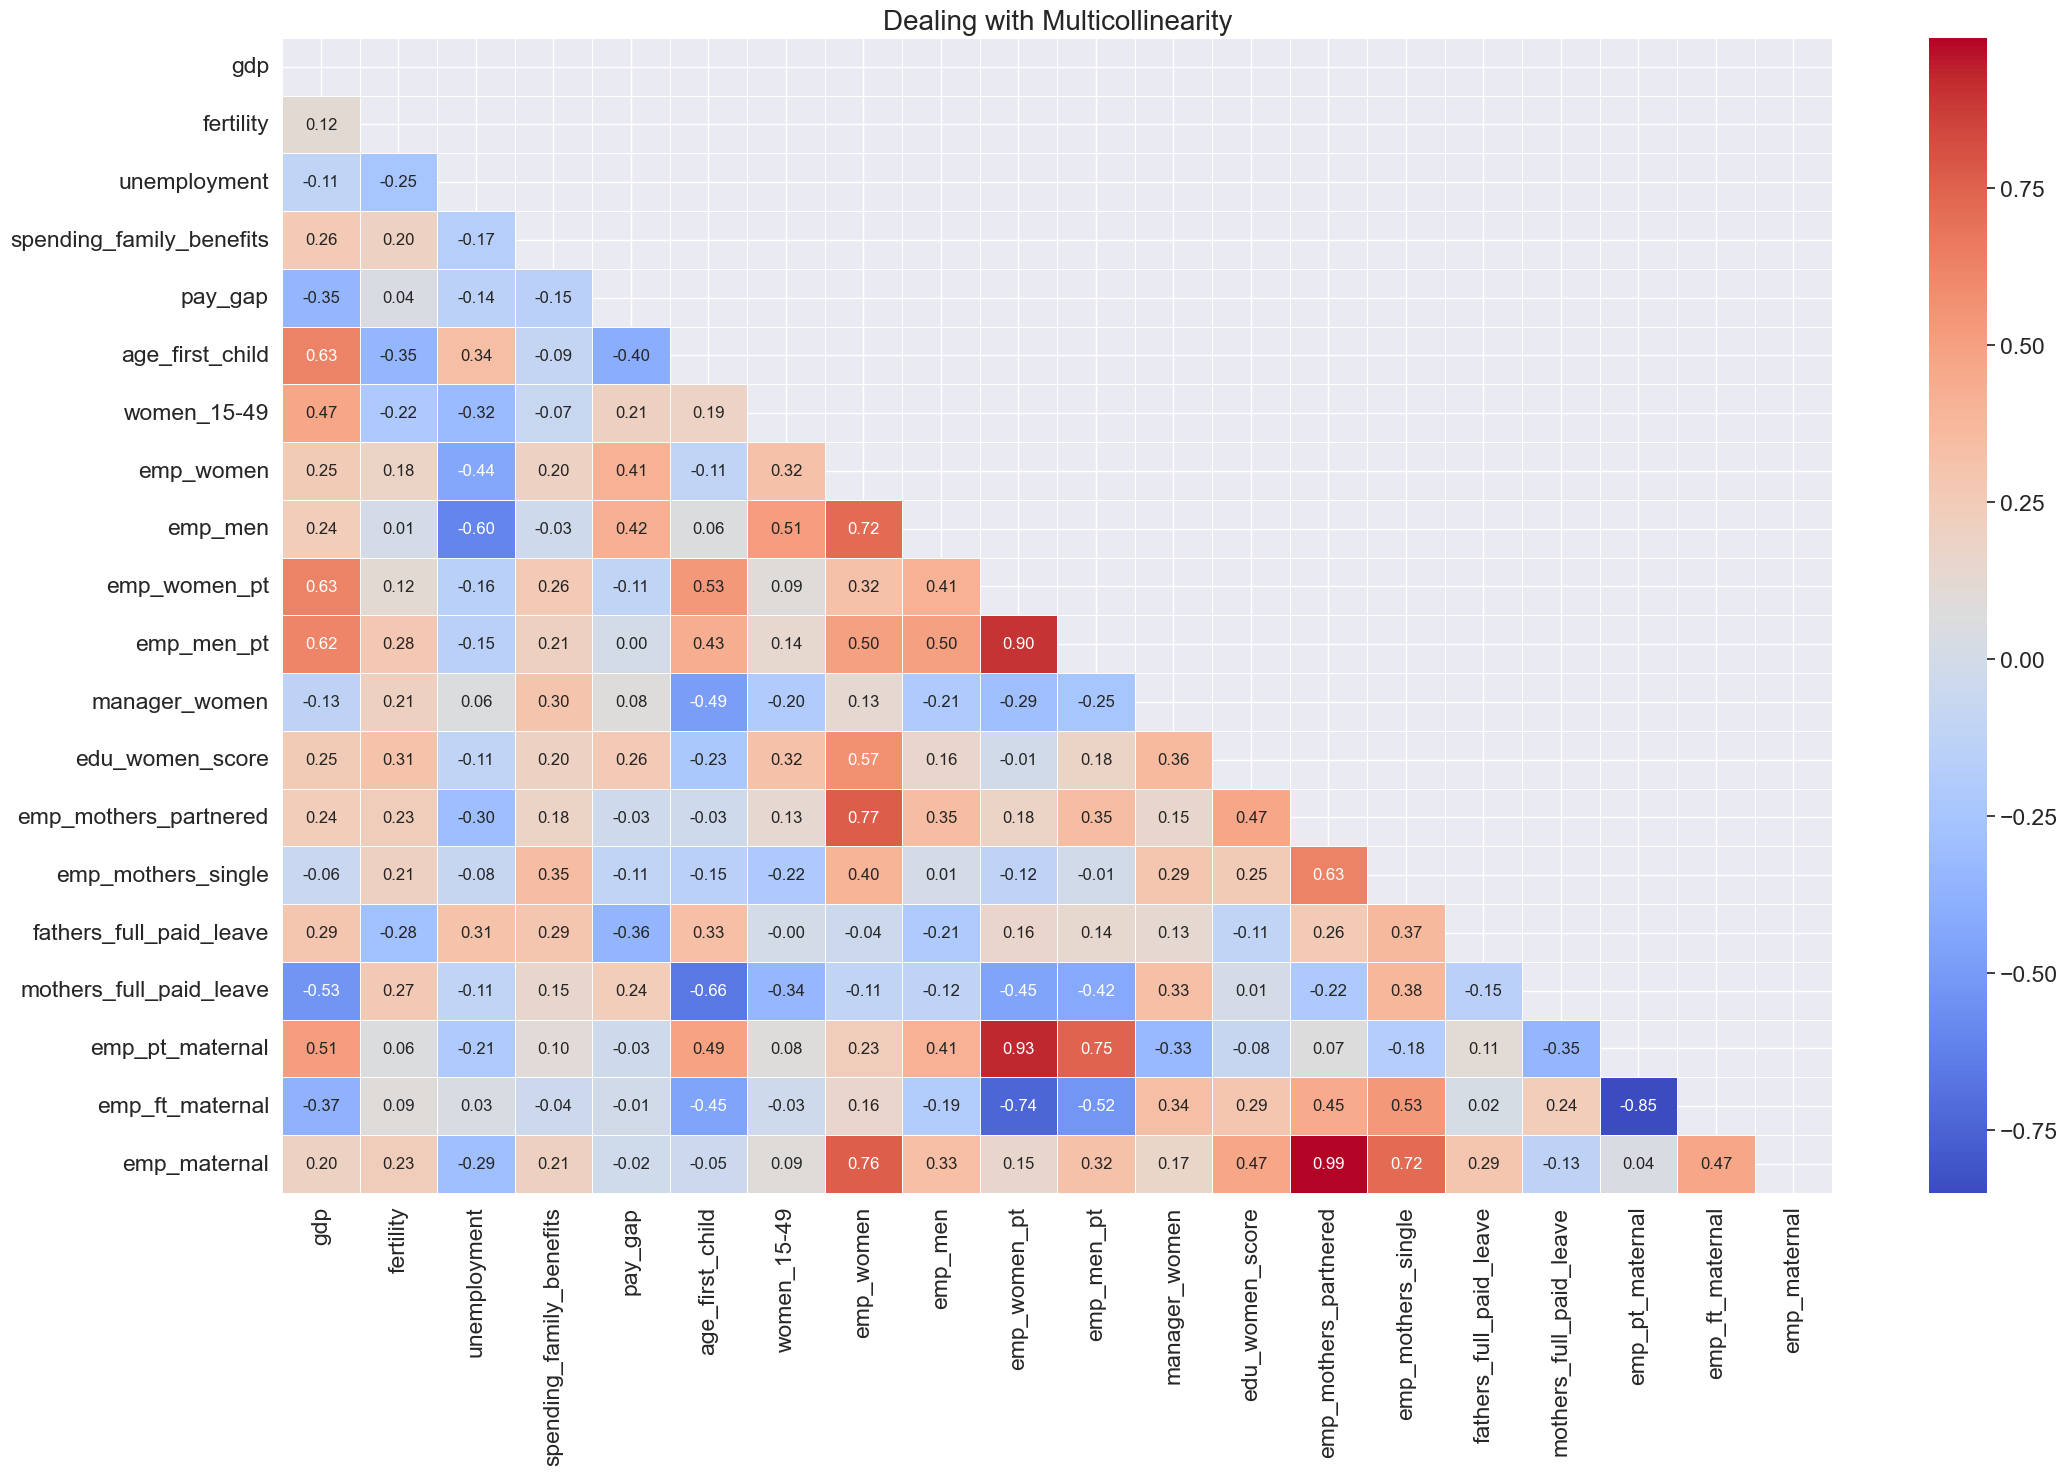

In [202]:
# selecting all numericals variables
num_corr = round(num.corr(), 2)

# Correlation Matrix-Heatmap Plot which shows only half of numbers (so no doubles)
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # hide the upper triangle
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5)
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax)
ax.set_title("Dealing with Multicollinearity", fontsize=20)
plt.show()

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #2d0df7;
    border-radius: 4px;
    background-color: #0dd4f7;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Multicollinearity:</strong>
<p>TEXT</p>
    <ul>
        <li>TEXT</li>
        <li>TEXT</li>
        <li>TEXT</li>
        <li>TEXT</li>
    </ul>
</div>

# <span style="color: #e3db24;">04 | Extra EDA I</span>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Additional Interesting Relations</strong>
<p>When analyzing this dataset, some other interesting connections which I did not suspect came to light. I will therefore display these here.</p>
</div>

## <span style="color: #ec7511;">Maternal Age at First Birth & Maternal Leave Allowance</span>

# <span style="color: #e3db24;">05 | Extra EDA II</span>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Paternal Use of Leave: Different Data Basis</strong>
<p>Also, I will add the analysis of the use of paternal leave which</p>
</div>

# <span style="color: #e3db24;">06 | Outlook</span>

<div style="
    padding: 15px;
    margin: 10px 0;
    border: 1px solid #f7be0d;
    border-radius: 4px;
    background-color: #e3db24;
    color: #060606;
    font-size: 16px;
    line-height: 1.5;
    word-wrap: break-word;
    text-align: left;">
    <strong>Next steps</strong>
<p>In this notebook hypotheses regarding influence factors on the maternal employment were put forward and tested with EDA methods. As a next step, I will do some further analysis using methods of inferential statistics, you can find the results in the notebook "inferential-maternal-employment" (in the same repo). There, all hypotheses for which a relationship was indicated, will be futher analyzed.</p>
</div>

## <span style="color: #ec7511;">Saving eda_df</span>

In [204]:
# path for folder "data"
file_path_1 = os.path.join(os.getcwd(), "data", "eda_df.xlsx")

# saving the data as excel file in folder "data"
eda_df.to_excel(file_path_1, index=False)